Para as primeiras três visualizações deste notebook, que consideramos como a primeira parte da análise - focada na relação entre desmatamento e produção de alimentos - utilizamos bancos de dados retirados do site ourworldindata.org. 

Estes dados necessitaram de pouco tratamento, dado que estavam disponibilizados já tratados, assim como acompanhados de visualizações em gráficos, de modo que o trabalho da primeira parte do exercício consistiu basicamente no ranqueamento de valores, seleção de linhas, remoção de colunas, arredondamento de valores e tradução de colunas para o português. 

Após esse leve tratamento, plotamos gráficos que se assemelham àqueles disponíveis no site, então frisamos que o exercício consiste mais na prática no uso de funções da biblioteca matplotlib do que propriamente na criação de gráficos inéditos. 

O primeiro banco de dados é referente ao percentual de países ou continentes responsáveis pelo desmatamento de florestas tropicais para produção de commodities. Os valores são de 2013.

Uma visualização do banco de dados, já tratado, pode ser encontrada em https://ourworldindata.org/what-are-drivers-deforestation. A fonte utilizada pelo site é Pendrill et al. (2019) - "Agricultural and forestry trade drives large share of tropical deforestation emissions" (https://www.sciencedirect.com/science/article/pii/S0959378018314365)

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df_desmatamento_percentual = pd.read_csv('../datasets/base_original_1_region-share-tropical-deforestation.csv')

In [64]:
df_desmatamento_percentual

,Entity,Code,Year,Share of commodity-driven deforestation
0,Africa,NaN,2013,17.456108
1,Americas (excl. Brazil and Mexico),NaN,2013,20.848145
2,Asia and Pacific (excl. Indonesia and India),NaN,2013,11.209447
3,Brazil,BRA,2013,33.118215
4,India,IND,2013,1.412748
5,Indonesia,IDN,2013,13.943974
6,Mexico,MEX,2013,2.011362


In [65]:
# eliminando colunas

df_desmatamento_percentual = df_desmatamento_percentual.drop(columns='Year')
df_desmatamento_percentual = df_desmatamento_percentual.drop(columns='Code')

In [66]:
# organizando valores de forma decrescente

df_desmatamento_percentual = df_desmatamento_percentual.sort_values('Share of commodity-driven deforestation', ascending=False)

In [67]:
# resetando o index

df_desmatamento_percentual = df_desmatamento_percentual.reset_index(drop=True)

In [68]:
# fazendo um slicing com os 5 maiores desmatadores da lista

df_desmatamento_percentual = df_desmatamento_percentual[0:5]

In [69]:
# renomeando colunas

df_desmatamento_percentual.columns.values[0] = 'Nações ou Continentes'

In [70]:
df_desmatamento_percentual.columns.values[1] = 'Porcentual de desmatamento de florestas tropicais para produção de commodities'

In [71]:
# transpondo linhas e colunas

df_desmatamento_percentual.transpose()

,0,1,2,3,4
Nações ou Continentes,Brazil,Americas (excl. Brazil and Mexico),Africa,Indonesia,Asia and Pacific (excl. Indonesia and India)
Porcentual de desmatamento de florestas tropicais para produção de commodities,33.118215,20.848145,17.456108,13.943974,11.209447


In [72]:
df_desmatamento_percentual = df_desmatamento_percentual.transpose()

In [73]:
df_desmatamento_percentual.values[0,0] = 'Brasil'
df_desmatamento_percentual.values[0,1] = 'Américas'
df_desmatamento_percentual.values[0,2] = 'África'
df_desmatamento_percentual.values[0,3] = 'Indonésia'
df_desmatamento_percentual.values[0,4] = 'Ásia e Pacífico'

In [74]:
df_desmatamento_percentual

,0,1,2,3,4
Nações ou Continentes,Brasil,Américas,África,Indonésia,Ásia e Pacífico
Porcentual de desmatamento de florestas tropicais para produção de commodities,33.118215,20.848145,17.456108,13.943974,11.209447


In [75]:
x=df_desmatamento_percentual.iloc[0]
y=df_desmatamento_percentual.iloc[1]

<Figure size 1000x600 with 0 Axes>

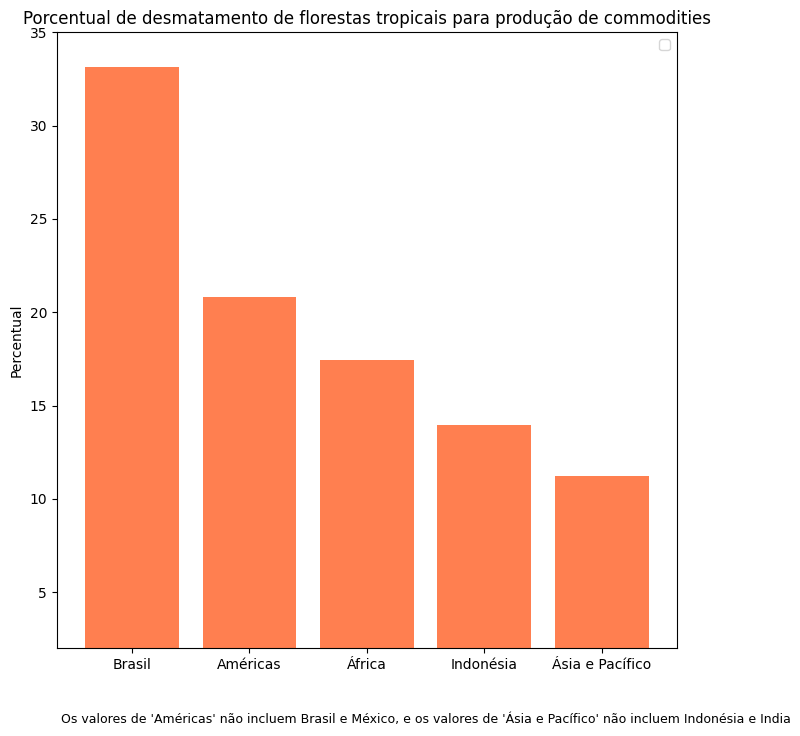

In [76]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem, no caso, um plot simples

plt.figure(figsize=(8, 8))

plt.bar(x, y, color='coral')

# definir texto do título e eixos x e y

plt.title('Porcentual de desmatamento de florestas tropicais para produção de commodities', fontsize=12)
plt.ylabel('Percentual')
plt.xlabel('')

texto = "Os valores de 'Américas' não incluem Brasil e México, e os valores de 'Ásia e Pacífico' não incluem Indonésia e India"
plt.text(2.5, -2, texto, ha='center', fontsize=9, bbox=dict(facecolor='white', edgecolor='white'))


# estabelecemos um range para o y que faça sentido para nossos dados

plt.ylim(2,35)

# removendo a legenda que seria criada automaticamente

plt.legend('')

# rotacionar legenda do eixo x

plt.xticks(rotation=0)

# plotar

plt.show()

In [77]:
df_desmatamento_percentual = df_desmatamento_percentual.transpose()

In [78]:
df_desmatamento_percentual.to_csv('../datasets/base_alterada_1_percentual_desmatamento.csv', index=True)

Como podemos ver, a nível global, o Brasil é o maior responsável pelo desmatamento de florestas tropicais para a produção de commodities.

A seguir, vamos entender quais commodities são associados à emissão de CO2. 

Vamos começar trabalhando com uma base de dados que relaciona a emissão de CO2 com dematamento por produto econômico. O banco de dados traz informações em toneladas.

Uma visualização do banco de dados, já tratado, pode ser encontrada em https://ourworldindata.org/deforestation. A fonte utilizada pelo site é Pendrill et al. (2019) - "Agricultural and forestry trade drives large share of tropical deforestation emissions" (https://www.sciencedirect.com/science/article/pii/S0959378018314365)

In [79]:
df_desmatamento_por_produtos = pd.read_csv("../datasets/base_original_2_deforestation-co2-trade-by-product.csv", index_col=0)

In [80]:
df_desmatamento_por_produtos = pd.DataFrame(df_desmatamento_por_produtos)

In [81]:
df_desmatamento_por_produtos

,Code,Year,cattle_meat,oilseed_products,other_crops,rice,veg_fruits_nuts,wheat,sugar,plant_fibres,other_meat_products,other_cereals
Entity,,,,,,,,,,,,
Australia,AUS,2013,1.767338e+06,4.969794e+06,8.730748e+05,8.793891e+05,1.175709e+06,4.149659e+04,1.523233e+05,1.010782e+05,0,8.903421e+04
Austria,AUT,2013,7.503263e+05,9.592118e+05,2.265329e+05,1.841184e+05,3.925072e+05,1.549506e+04,3.345332e+04,2.496659e+04,0,3.014620e+04
Belgium,BEL,2013,1.666691e+06,4.135305e+06,1.082828e+06,4.588134e+05,1.633892e+06,5.068496e+04,8.568704e+04,1.060145e+05,0,8.620038e+04
Brazil,BRA,2013,4.662975e+08,7.542319e+06,5.085773e+06,1.027721e+07,1.185322e+07,3.112054e+06,6.621832e+06,1.130640e+06,0,2.329114e+06
Bulgaria,BGR,2013,7.455472e+04,2.875856e+05,9.385930e+04,3.281158e+04,6.524788e+04,2.691416e+03,1.226505e+04,4.320698e+03,0,5.368398e+03
Canada,CAN,2013,2.665048e+06,3.624348e+06,2.009818e+06,7.020911e+05,1.593327e+06,7.027788e+04,1.542816e+05,9.545495e+04,0,1.104205e+05
China,CHN,2013,1.238704e+07,1.183979e+08,1.589519e+07,5.441660e+06,1.276554e+07,2.074766e+05,1.486522e+06,1.250616e+06,0,4.605863e+05
Croatia,HRV,2013,1.175270e+05,1.850677e+05,4.381845e+04,2.820160e+04,5.062478e+04,2.741824e+03,6.320206e+03,3.297629e+03,0,5.155453e+03
Cyprus,CYP,2013,6.581734e+04,8.713051e+04,1.294665e+04,1.947054e+04,2.309576e+04,2.452113e+03,3.942723e+03,7.984421e+02,0,3.783883e+03


In [82]:
# selecionando dados do Brasil

emissoes_brasil = df_desmatamento_por_produtos[df_desmatamento_por_produtos['Code'].isin(['BRA'])]

In [83]:
emissoes_brasil

,Code,Year,cattle_meat,oilseed_products,other_crops,rice,veg_fruits_nuts,wheat,sugar,plant_fibres,other_meat_products,other_cereals
Entity,,,,,,,,,,,,
Brazil,BRA,2013,4.662975e+08,7.542319e+06,5.085773e+06,1.027721e+07,1.185322e+07,3.112054e+06,6.621832e+06,1.130640e+06,0,2.329114e+06


In [84]:
# transformando os números em milhões e arredondando-os

emissoes_brasil['cattle_meat'] = (emissoes_brasil['cattle_meat'] / 1_000_000).round()
emissoes_brasil['oilseed_products'] = (emissoes_brasil['oilseed_products'] / 1_000_000).round()
emissoes_brasil['other_crops'] = (emissoes_brasil['other_crops'] / 1_000_000).round()
emissoes_brasil['rice'] = (emissoes_brasil['rice'] / 1_000_000).round()
emissoes_brasil['veg_fruits_nuts'] = (emissoes_brasil['veg_fruits_nuts'] / 1_000_000).round()
emissoes_brasil['wheat'] = (emissoes_brasil['wheat'] / 1_000_000).round()
emissoes_brasil['sugar'] = (emissoes_brasil['sugar'] / 1_000_000).round()
emissoes_brasil['plant_fibres'] = (emissoes_brasil['plant_fibres'] / 1_000_000).round()
emissoes_brasil['other_cereals'] = (emissoes_brasil['other_cereals'] / 1_000_000).round()

C:\Users\zenit\AppData\Local\Temp\ipykernel_12376\364587756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emissoes_brasil['cattle_meat'] = (emissoes_brasil['cattle_meat'] / 1_000_000).round()
C:\Users\zenit\AppData\Local\Temp\ipykernel_12376\364587756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emissoes_brasil['oilseed_products'] = (emissoes_brasil['oilseed_products'] / 1_000_000).round()
C:\Users\zenit\AppData\Local\Temp\ipykernel_12376\364587756.py:5: SettingWithCopyWarning: 
A value is tryi

In [85]:
emissoes_brasil

,Code,Year,cattle_meat,oilseed_products,other_crops,rice,veg_fruits_nuts,wheat,sugar,plant_fibres,other_meat_products,other_cereals
Entity,,,,,,,,,,,,
Brazil,BRA,2013,466.0,8.0,5.0,10.0,12.0,3.0,7.0,1.0,0,2.0


In [86]:
# traduzindo colunas

traducoes = {
    'Code': 'Código',
    'Year': 'Ano',
    'cattle_meat': 'Carne bovina',
    'oilseed_products': 'Produtos à base de oleaginosas',
    'other_crops': 'Outras colheitas',
    'rice': 'Arroz',
    'veg_fruits_nuts': 'Vegetais, frutas e castanhas',
    'wheat': 'Trigo',
    'sugar': 'Açúcar',
    'plant_fibres': 'Fibras vegetais',
    'other_meat_products': 'Outros produtos animais',
    'other_cereals':  'Outros cereais'
}

novas_colunas = []

for chave, valor in traducoes.items():
    novas_colunas.append(valor)

novas_colunas

['Código',
 'Ano',
 'Carne bovina',
 'Produtos à base de oleaginosas',
 'Outras colheitas',
 'Arroz',
 'Vegetais, frutas e castanhas',
 'Trigo',
 'Açúcar',
 'Fibras vegetais',
 'Outros produtos animais',
 'Outros cereais']

In [87]:
emissoes_brasil.columns = novas_colunas
emissoes_brasil

,Código,Ano,Carne bovina,Produtos à base de oleaginosas,Outras colheitas,Arroz,"Vegetais, frutas e castanhas",Trigo,Açúcar,Fibras vegetais,Outros produtos animais,Outros cereais
Entity,,,,,,,,,,,,
Brazil,BRA,2013,466.0,8.0,5.0,10.0,12.0,3.0,7.0,1.0,0,2.0


In [88]:
# removendo colunas que não serão utilizadas na plotagem

emissoes_brasil = emissoes_brasil.drop(columns='Ano')
emissoes_brasil = emissoes_brasil.drop(columns='Código')
emissoes_brasil = emissoes_brasil.drop(columns='Outros produtos animais')

<Figure size 2500x1500 with 0 Axes>

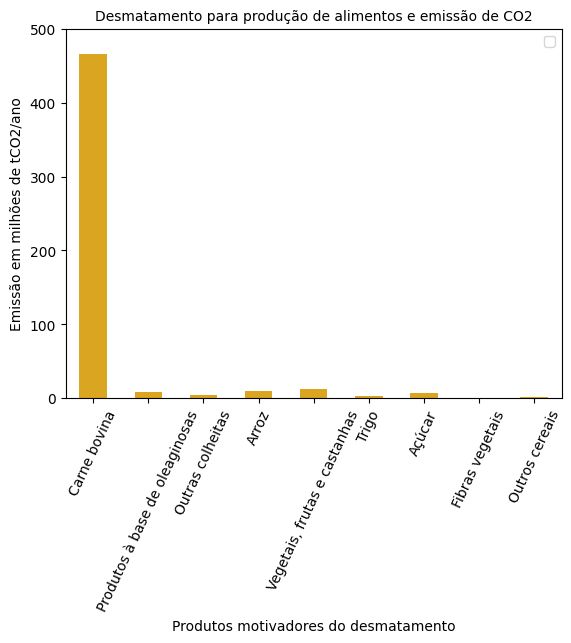

In [89]:
# definir tamanho da figura
plt.figure(figsize=(25, 15))

emissoes_brasil_transposta = emissoes_brasil.transpose()

# instanciar o tipo de plotagem, no caso, um plot simples
emissoes_brasil_transposta.plot(kind='bar', color='goldenrod', legend=False)

# definir texto do título e eixos x e y

plt.title('Desmatamento para produção de alimentos e emissão de CO2', fontsize=10)
plt.ylabel('Emissão em milhões de tCO2/ano', fontsize=10)
plt.xlabel('Produtos motivadores do desmatamento')

# estabelecemos um range para o y que faça sentido para nossos dados

plt.ylim(0,500)

# removendo a legenda que seria criada automaticamente

plt.legend('')

# rotacionar legenda do eixo x

plt.xticks(rotation=65)

# plotar

plt.show()

In [90]:
emissoes_brasil.to_csv('../datasets/base_alterada_2_emissoesbrasil.csv', index=True)

Como podemos ver pelo gráfico, a pecuária é a líder nas emissões de CO2 associadas ao desmatamento. Entendido o papel da produção pecuária nas emissões de CO2, é possível olhar para outros motivadores de desmatamento na região Amazônica, que faremos a seguir.

Para isso, importamos um dataset que mede, em hectares e a cada ano, a conversão permanente de área de floresta para outros usos da terra (desmatamento) e perda temporária de área de floresta (degradação).

Uma visualização do banco de dados, já tratado, pode ser encontrada em https://ourworldindata.org/soy. A fonte utilizada pelo site é Tyukavina et al. (2017) - "Types and rates of forest disturbance in Brazilian Legal Amazon, 2000–2013" (https://advances.sciencemag.org/content/3/4/e1601047)

In [91]:
df_motivadores_do_desmatamento = pd.read_csv("../datasets/base_original_3_drivers-forest-loss-brazil-amazon.csv")

In [92]:
df_motivadores_do_desmatamento = pd.DataFrame(df_motivadores_do_desmatamento)

In [93]:
df_motivadores_do_desmatamento

,Entity,Code,Year,flooding_due_to_dams,natural_disturbances,fire,selective_logging,other_infrastructure,roads,mining,small-scale_clearing,tree_plantations_including_palm,pasture,commercial_crops
0,Brazil,BRA,2001,0,0,26000,96000,9000,13000,9000,249000,44000,1520000,280000
1,Brazil,BRA,2002,79000,35000,114000,96000,13000,31000,9000,293000,44000,2568000,415000
2,Brazil,BRA,2003,0,35000,44000,149000,9000,35000,0,358000,26000,2761000,550000
3,Brazil,BRA,2004,26000,22000,79000,131000,13000,57000,0,415000,92000,2564000,747000
4,Brazil,BRA,2005,17000,26000,393000,140000,13000,35000,0,288000,52000,2665000,328000
5,Brazil,BRA,2006,17000,26000,79000,52000,9000,17000,0,306000,26000,1861000,188000
6,Brazil,BRA,2007,9000,22000,446000,96000,13000,13000,9000,310000,39000,1577000,79000
7,Brazil,BRA,2008,0,17000,70000,61000,17000,48000,9000,397000,17000,1345000,52000
8,Brazil,BRA,2009,9000,31000,44000,87000,9000,9000,0,301000,35000,847000,57000
9,Brazil,BRA,2010,0,44000,537000,114000,9000,22000,4000,271000,9000,616000,100000


In [94]:
# traduzindo colunas

traducoes_2 = {
    'Entity': 'Nação',
    'Code': 'Código',
    'Year': 'Ano',
    'flooding_due_to_dams': 'Inundação (Hidrelétricas)',
    'natural_disturbances': 'Perturbações naturais',
    'fire': 'Incêndios',
    'selective_logging': 'Corte seletivo',
    'other_infrastructure': 'Obras de infraestrutura',
    'roads': 'Estradas',
    'mining': 'Mineração',
    'small-scale_clearing': 'Desmatamento em pequena escala',
    'tree_plantations_including_palm':  'Plantação de outras árvores',
    'pasture': 'Pasto',
    'commercial_crops': 'Colheitas comerciais'
}

novas_colunas_2 = []

for chave, valor in traducoes_2.items():
    novas_colunas_2.append(valor)

novas_colunas_2

['Nação',
 'Código',
 'Ano',
 'Inundação (Hidrelétricas)',
 'Perturbações naturais',
 'Incêndios',
 'Corte seletivo',
 'Obras de infraestrutura',
 'Estradas',
 'Mineração',
 'Desmatamento em pequena escala',
 'Plantação de outras árvores',
 'Pasto',
 'Colheitas comerciais']

In [95]:
# colocando as novas colunas no df

df_motivadores_do_desmatamento.columns = novas_colunas_2
df_motivadores_do_desmatamento

,Nação,Código,Ano,Inundação (Hidrelétricas),Perturbações naturais,Incêndios,Corte seletivo,Obras de infraestrutura,Estradas,Mineração,Desmatamento em pequena escala,Plantação de outras árvores,Pasto,Colheitas comerciais
0,Brazil,BRA,2001,0,0,26000,96000,9000,13000,9000,249000,44000,1520000,280000
1,Brazil,BRA,2002,79000,35000,114000,96000,13000,31000,9000,293000,44000,2568000,415000
2,Brazil,BRA,2003,0,35000,44000,149000,9000,35000,0,358000,26000,2761000,550000
3,Brazil,BRA,2004,26000,22000,79000,131000,13000,57000,0,415000,92000,2564000,747000
4,Brazil,BRA,2005,17000,26000,393000,140000,13000,35000,0,288000,52000,2665000,328000
5,Brazil,BRA,2006,17000,26000,79000,52000,9000,17000,0,306000,26000,1861000,188000
6,Brazil,BRA,2007,9000,22000,446000,96000,13000,13000,9000,310000,39000,1577000,79000
7,Brazil,BRA,2008,0,17000,70000,61000,17000,48000,9000,397000,17000,1345000,52000
8,Brazil,BRA,2009,9000,31000,44000,87000,9000,9000,0,301000,35000,847000,57000
9,Brazil,BRA,2010,0,44000,537000,114000,9000,22000,4000,271000,9000,616000,100000


In [96]:
# removendo colunas que não serão utilizadas na plotagem

df_motivadores_do_desmatamento = df_motivadores_do_desmatamento.drop(columns='Nação')
df_motivadores_do_desmatamento = df_motivadores_do_desmatamento.drop(columns='Código')

In [97]:
df_motivadores_do_desmatamento

,Ano,Inundação (Hidrelétricas),Perturbações naturais,Incêndios,Corte seletivo,Obras de infraestrutura,Estradas,Mineração,Desmatamento em pequena escala,Plantação de outras árvores,Pasto,Colheitas comerciais
0,2001,0,0,26000,96000,9000,13000,9000,249000,44000,1520000,280000
1,2002,79000,35000,114000,96000,13000,31000,9000,293000,44000,2568000,415000
2,2003,0,35000,44000,149000,9000,35000,0,358000,26000,2761000,550000
3,2004,26000,22000,79000,131000,13000,57000,0,415000,92000,2564000,747000
4,2005,17000,26000,393000,140000,13000,35000,0,288000,52000,2665000,328000
5,2006,17000,26000,79000,52000,9000,17000,0,306000,26000,1861000,188000
6,2007,9000,22000,446000,96000,13000,13000,9000,310000,39000,1577000,79000
7,2008,0,17000,70000,61000,17000,48000,9000,397000,17000,1345000,52000
8,2009,9000,31000,44000,87000,9000,9000,0,301000,35000,847000,57000
9,2010,0,44000,537000,114000,9000,22000,4000,271000,9000,616000,100000


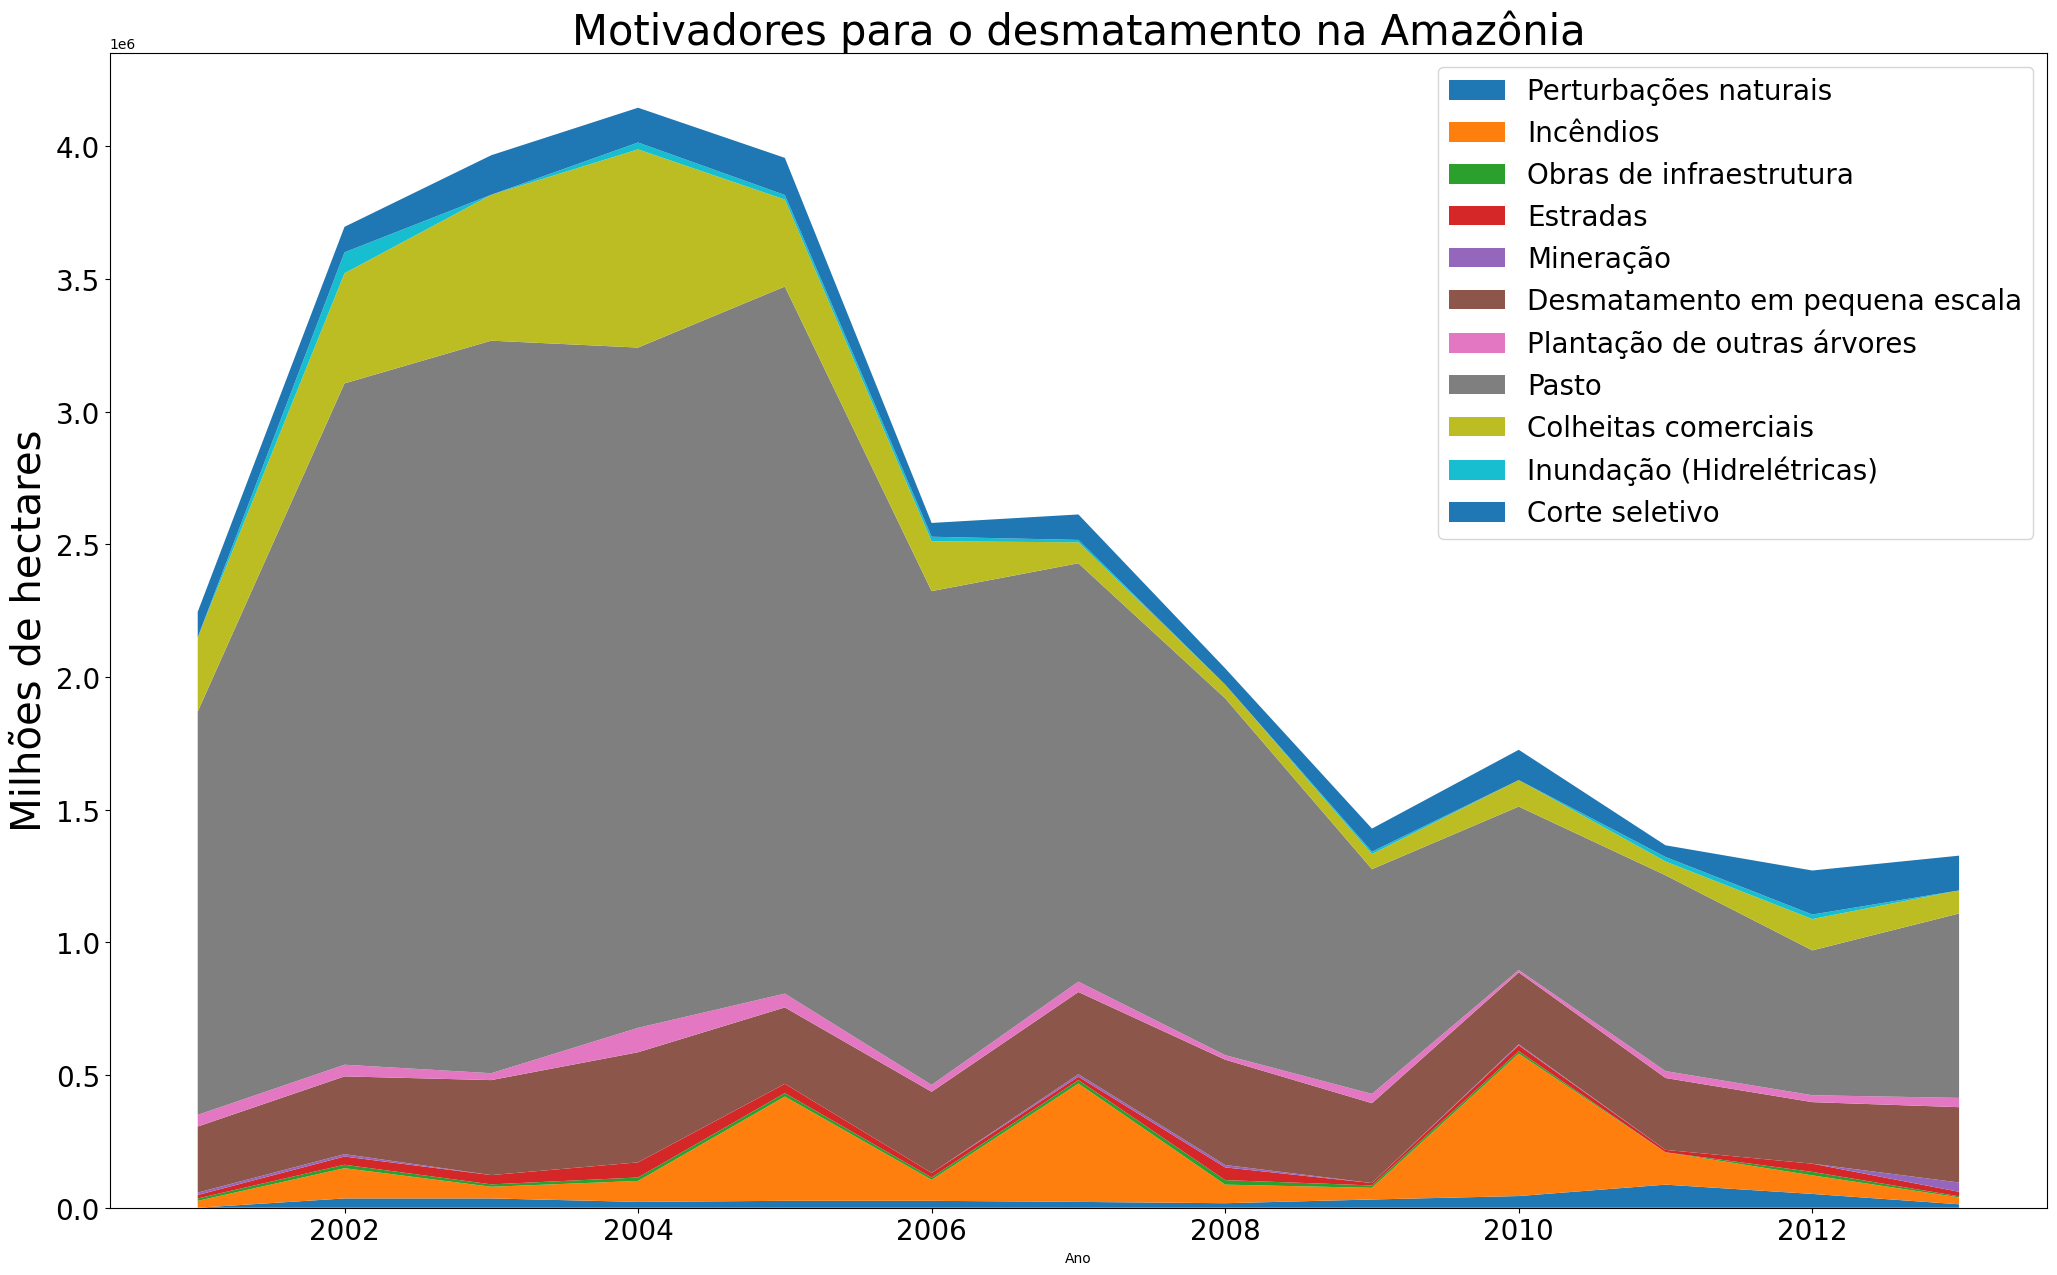

In [98]:
plt.figure(figsize=(25, 15))

x=df_motivadores_do_desmatamento['Ano']
y1=df_motivadores_do_desmatamento['Perturbações naturais']
y2=df_motivadores_do_desmatamento['Incêndios']
y3=df_motivadores_do_desmatamento['Obras de infraestrutura']
y4=df_motivadores_do_desmatamento['Estradas']
y5=df_motivadores_do_desmatamento['Mineração']
y6=df_motivadores_do_desmatamento['Desmatamento em pequena escala']
y7=df_motivadores_do_desmatamento['Plantação de outras árvores']
y8=df_motivadores_do_desmatamento['Pasto']
y9=df_motivadores_do_desmatamento['Colheitas comerciais']
y10=df_motivadores_do_desmatamento['Inundação (Hidrelétricas)']
y11=df_motivadores_do_desmatamento['Corte seletivo']

# utilizamos o "stacked area chart"
plt.stackplot(x,y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, labels=['Perturbações naturais', 'Incêndios', 'Obras de infraestrutura', 'Estradas', 'Mineração', 'Desmatamento em pequena escala', 'Plantação de outras árvores', 'Pasto', 'Colheitas comerciais', 'Inundação (Hidrelétricas)', 'Corte seletivo'])
plt.legend(fontsize="20", loc='upper right')

# definir texto do título e eixos x e y

plt.title('Motivadores para o desmatamento na Amazônia',fontsize="30")
plt.ylabel('Milhões de hectares', fontsize=29)
plt.xlabel('Ano')

# alterando o tamanho

plt.xticks(fontsize="20")
plt.yticks(fontsize="20")

# plotar

plt.show()

In [99]:
df_motivadores_do_desmatamento.to_csv('../datasets/base_alterada_3_motivadoresdesmatamento.csv', index=False)

O gráfico acima explicita que o desmatamento para fazer pasto é o grande responsável pelo desmatamento na Amazônia. Outras atividades relacionadas à agricultura, seja em larga ou pequena escala, como incêndios e colheitas comerciais, são fatores relevantes.

A segunda parte da nossa análise será voltada aos impactos da produção agropecuária na economia brasileira.

Os próximos dados, com dados do Censo Agropecuário e acessada por meio do SIDRA (Sistema IBGE de Recuperação Automática), vai necessitar de alguns tratamentos, por conta da maneira que o arquivo CSV foi escrito.

Os dados podem ser encontrados em https://sidra.ibge.gov.br/Acervo.

In [100]:
df_efetivo_animais = pd.read_csv("../datasets/base_original_4_efetivo-animais-agropecuaria.csv", index_col=0)

In [101]:
df_efetivo_animais = pd.DataFrame(df_efetivo_animais)

In [102]:
# como podemos ver, o dataframe tem colunas não nomeadas, valores NaN e, 
# embora a informação que precisamos esteja presente, ela está desorganizada

df_efetivo_animais

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
Tabela 281 - Efetivo de animais em estabelecimentos agropecuários por espécie de efetivo - série histórica (1970/2006),,,,,,
Variável - Efetivo de animais (Cabeças),NaN,NaN,NaN,NaN,NaN,NaN
NaN,Ano x Espécie da pecuária,NaN,NaN,NaN,NaN,NaN
NaN,1970,1975,1980,1985,1995,2006
NaN,Bovinos,Bovinos,Bovinos,Bovinos,Bovinos,Bovinos
Brasil,78562250,101673753,118085872,128041757,153058275,176147501
Fonte: IBGE - Censo Agropecuário,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# vamos usar a função transpose, ou seja, inverter colunas com linhas e vice-versa

df_efetivo_animais = df_efetivo_animais.transpose()

In [104]:
df_efetivo_animais

Tabela 281 - Efetivo de animais em estabelecimentos agropecuários por espécie de efetivo - série histórica (1970/2006),Variável - Efetivo de animais (Cabeças),NaN,NaN,NaN,Brasil,Fonte: IBGE - Censo Agropecuário
Unnamed: 1,NaN,Ano x Espécie da pecuária,1970,Bovinos,78562250,NaN
Unnamed: 2,NaN,NaN,1975,Bovinos,101673753,NaN
Unnamed: 3,NaN,NaN,1980,Bovinos,118085872,NaN
Unnamed: 4,NaN,NaN,1985,Bovinos,128041757,NaN
Unnamed: 5,NaN,NaN,1995,Bovinos,153058275,NaN
Unnamed: 6,NaN,NaN,2006,Bovinos,176147501,NaN


In [105]:
# retirando colunas desnecessárias

df_efetivo_animais = df_efetivo_animais.drop(columns='Fonte: IBGE - Censo Agropecuário')
df_efetivo_animais = df_efetivo_animais.drop(columns='Variável - Efetivo de animais (Cabeças)')

In [106]:
df_efetivo_animais

Tabela 281 - Efetivo de animais em estabelecimentos agropecuários por espécie de efetivo - série histórica (1970/2006),NaN,NaN,NaN,Brasil
Unnamed: 1,Ano x Espécie da pecuária,1970,Bovinos,78562250
Unnamed: 2,NaN,1975,Bovinos,101673753
Unnamed: 3,NaN,1980,Bovinos,118085872
Unnamed: 4,NaN,1985,Bovinos,128041757
Unnamed: 5,NaN,1995,Bovinos,153058275
Unnamed: 6,NaN,2006,Bovinos,176147501


In [107]:
# usando a função columns para ver quais colunas são identificadas

df_efetivo_animais.columns

Index([nan, nan, nan, 'Brasil'], dtype='object', name='Tabela 281 - Efetivo de animais em estabelecimentos agropecuários por espécie de efetivo - série histórica (1970/2006)')

In [108]:
# usando indexação, confirmamos que nossa última coluna (a única nomeada) corresponde ao índice 3

df_efetivo_animais.columns[3]

'Brasil'

In [109]:
# a partir disso, vamos renomeando as colunas 

df_efetivo_animais.columns.values[3] = 'Cabeças de gado'

In [110]:
df_efetivo_animais.columns.values[2] = 'Tipo de animal'

In [111]:
df_efetivo_animais.columns.values[1] = 'Ano'

In [112]:
df_efetivo_animais.columns.values[0] = 'Coluna vazia'

In [113]:
df_efetivo_animais

Tabela 281 - Efetivo de animais em estabelecimentos agropecuários por espécie de efetivo - série histórica (1970/2006),Coluna vazia,Ano,Tipo de animal,Cabeças de gado
Unnamed: 1,Ano x Espécie da pecuária,1970,Bovinos,78562250
Unnamed: 2,NaN,1975,Bovinos,101673753
Unnamed: 3,NaN,1980,Bovinos,118085872
Unnamed: 4,NaN,1985,Bovinos,128041757
Unnamed: 5,NaN,1995,Bovinos,153058275
Unnamed: 6,NaN,2006,Bovinos,176147501


In [114]:
# retirando colunas desnecessárias

df_efetivo_animais = df_efetivo_animais.drop(columns='Tipo de animal')
df_efetivo_animais = df_efetivo_animais.drop(columns='Coluna vazia')

In [115]:
df_efetivo_animais

Tabela 281 - Efetivo de animais em estabelecimentos agropecuários por espécie de efetivo - série histórica (1970/2006),Ano,Cabeças de gado
Unnamed: 1,1970,78562250
Unnamed: 2,1975,101673753
Unnamed: 3,1980,118085872
Unnamed: 4,1985,128041757
Unnamed: 5,1995,153058275
Unnamed: 6,2006,176147501


In [116]:
# como podemos ver, os valores de "Cabeça de gado" são dados como objeto 

df_efetivo_animais.dtypes

Tabela 281 - Efetivo de animais em estabelecimentos agropecuários por espécie de efetivo - série histórica (1970/2006)
Ano                object
Cabeças de gado    object
dtype: object

In [117]:
# fazemos a conversão para int

df_efetivo_animais = df_efetivo_animais.astype(int)

In [118]:
# transformando os números em milhões e arredondando-os, mantendo dois algarismos depois da vírgula

df_efetivo_animais['Cabeças de gado'] = (df_efetivo_animais['Cabeças de gado'] / 1_000_000).round(2)


In [119]:
df_efetivo_animais.columns.values[1] = 'Cabeças de gado (em milhões)'

In [120]:
df_efetivo_animais = df_efetivo_animais.reset_index(drop=True)

In [121]:
df_efetivo_animais

Tabela 281 - Efetivo de animais em estabelecimentos agropecuários por espécie de efetivo - série histórica (1970/2006),Ano,Cabeças de gado (em milhões)
0,1970,78.56
1,1975,101.67
2,1980,118.09
3,1985,128.04
4,1995,153.06
5,2006,176.15


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


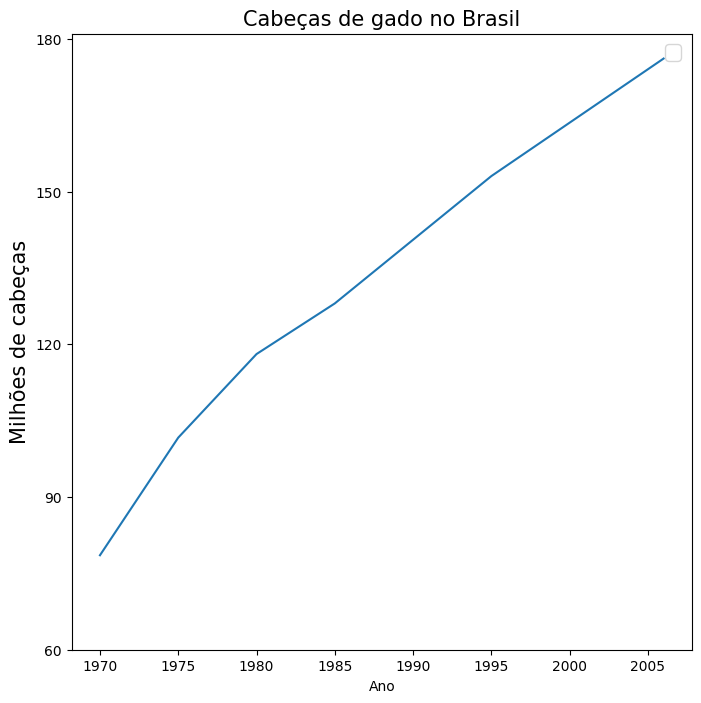

In [122]:
plt.figure(figsize=(8, 8))

x=df_efetivo_animais['Ano']
y=df_efetivo_animais['Cabeças de gado']

# plotando
plt.plot(x,y)
plt.legend(fontsize="15", loc='upper right')

# definir texto do título e eixos x e y

plt.title('Cabeças de gado no Brasil',fontsize="15")
plt.ylabel('Milhões de cabeças', fontsize="15")
plt.xlabel('Ano')

# estabelecendo a escala do eixo y
eixo_y = [60, 90, 120, 150, 180]
plt.yticks(eixo_y)

# alterando o tamanho

plt.xticks(fontsize="10")
plt.yticks(fontsize="10")

# plotar

plt.show()

In [123]:
df_efetivo_animais.to_csv('../datasets/base_alterada_4_censocabecasdegado.csv', index=False)

A partir da plotagem do gráfico, ficou evidente que os dados faltantes prejudicam um pouco a visualização das informações, pois no dataset utilizado há apenas informações dos anos 1970, 1975, 1980, 1985, 1995 e 2006.

Apesar da falta de dados, é possível observar que o efetivo de cabeças de gado em 2006 correspondia a mais que o dobro do efetivo de 1970.

Por conta disso, resolvemos buscar outro dataset com mais informações.

O próximo banco de dados advém da Pesquisa Trimestral do Abate de Animais e diz respeito ao abatimento de gado.

Os dados podem ser encontrados em: https://www.ibge.gov.br/estatisticas/economicas/agricultura-e-pecuaria/21119-primeiros-resultados-2abate.html?=&t=series-historicas

In [124]:
df_bovinos_abatidos = pd.read_csv("../datasets/base_original_5_bovinos_abatidos_por_trimestre.csv")

In [125]:
df_bovinos_abatidos = pd.DataFrame(df_bovinos_abatidos)

In [126]:
df_bovinos_abatidos

,"Quantidade de bovinos abatidos, no trimestre",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107
0,NaN,NaN,1º trimestre 1997,2º trimestre 1997,3º trimestre 1997,4º trimestre 1997,1º trimestre 1998,2º trimestre 1998,3º trimestre 1998,4º trimestre 1998,...,1º trimestre 2021,2º trimestre 2021,3º trimestre 2021,4º trimestre 2021,1º trimestre 2022,2º trimestre 2022,3º trimestre 2022,4º trimestre 2022,1º trimestre 2023,2º trimestre 2023
1,Brasil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brasil,NaN,3.510.085,3.674.828,3.784.109,3.917.238,3.640.794,3.714.362,3.676.014,3.875.306,...,6.597.323,7.126.495,7.019.544,6.961.491,7.011.231,7.428.815,7.963.127,7.544.411,7.372.174,8.363.269
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Fonte: ""IBGE - Pesquisa Trimestral do Abate de...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df_bovinos_abatidos.dtypes

Quantidade de bovinos abatidos, no trimestre     object
Unnamed: 1                                      float64
Unnamed: 2                                       object
Unnamed: 3                                       object
Unnamed: 4                                       object
                                                 ...   
Unnamed: 103                                     object
Unnamed: 104                                     object
Unnamed: 105                                     object
Unnamed: 106                                     object
Unnamed: 107                                     object
Length: 108, dtype: object

In [128]:
# transformando aquela única coluna float em objeto

df_bovinos_abatidos['Unnamed: 1'] = df_bovinos_abatidos['Unnamed: 1'].astype(object)

In [129]:
# removendo colunas para que, ao final, tenhamos apenas valores do 1º trimestre

index = 0
substring = '2º trimestre'

for col in df_bovinos_abatidos.columns:
    if isinstance(df_bovinos_abatidos.loc[index, col], (str, float)):
        novo_valor = str(df_bovinos_abatidos.loc[index, col])
        if substring in novo_valor:
            df_bovinos_abatidos.drop(columns=col, inplace=True)



In [130]:
index = 0
substring = '3º trimestre'

for col in df_bovinos_abatidos.columns:
    if isinstance(df_bovinos_abatidos.loc[index, col], (str, float)):
        novo_valor = str(df_bovinos_abatidos.loc[index, col])
        if substring in novo_valor:
            df_bovinos_abatidos.drop(columns=col, inplace=True)


In [131]:
index = 0
substring = '4º trimestre'

for col in df_bovinos_abatidos.columns:
    if isinstance(df_bovinos_abatidos.loc[index, col], (str, float)):
        novo_valor = str(df_bovinos_abatidos.loc[index, col])
        if substring in novo_valor:
            df_bovinos_abatidos.drop(columns=col, inplace=True)


In [132]:
df_bovinos_abatidos

,"Quantidade de bovinos abatidos, no trimestre",Unnamed: 1,Unnamed: 2,Unnamed: 6,Unnamed: 10,Unnamed: 14,Unnamed: 18,Unnamed: 22,Unnamed: 26,Unnamed: 30,...,Unnamed: 70,Unnamed: 74,Unnamed: 78,Unnamed: 82,Unnamed: 86,Unnamed: 90,Unnamed: 94,Unnamed: 98,Unnamed: 102,Unnamed: 106
0,NaN,NaN,1º trimestre 1997,1º trimestre 1998,1º trimestre 1999,1º trimestre 2000,1º trimestre 2001,1º trimestre 2002,1º trimestre 2003,1º trimestre 2004,...,1º trimestre 2014,1º trimestre 2015,1º trimestre 2016,1º trimestre 2017,1º trimestre 2018,1º trimestre 2019,1º trimestre 2020,1º trimestre 2021,1º trimestre 2022,1º trimestre 2023
1,Brasil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brasil,NaN,3.510.085,3.640.794,3.862.619,4.093.651,4.316.999,4.564.084,5.314.345,5.971.101,...,8.372.872,7.739.650,7.319.737,7.398.120,7.773.005,7.927.343,7.336.730,6.597.323,7.011.231,7.372.174
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Fonte: ""IBGE - Pesquisa Trimestral do Abate de...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
# removendo str para posteriormente transformar em valor numérico

index = 0  
df_bovinos_abatidos.loc[index] = df_bovinos_abatidos.loc[index].replace('1º trimestre', '', regex=True)


In [134]:
# removendo uma coluna desnecessária

df_bovinos_abatidos = df_bovinos_abatidos.drop(columns='Quantidade de bovinos abatidos, no trimestre')

In [135]:
# a base de dados utiliza a notação brasileira, em que o . separa milhares e milhões
# nosso programa vai ler esses pontos como separadores decimais, então precisamos modifica-los

for col in df_bovinos_abatidos.columns:
    df_bovinos_abatidos[col] = df_bovinos_abatidos[col].str.replace('.', '')
    df_bovinos_abatidos[col] = pd.to_numeric(df_bovinos_abatidos[col])
    

In [136]:
df_bovinos_abatidos

,Unnamed: 1,Unnamed: 2,Unnamed: 6,Unnamed: 10,Unnamed: 14,Unnamed: 18,Unnamed: 22,Unnamed: 26,Unnamed: 30,Unnamed: 34,...,Unnamed: 70,Unnamed: 74,Unnamed: 78,Unnamed: 82,Unnamed: 86,Unnamed: 90,Unnamed: 94,Unnamed: 98,Unnamed: 102,Unnamed: 106
0,NaN,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3510085.0,3640794.0,3862619.0,4093651.0,4316999.0,4564084.0,5314345.0,5971101.0,6446415.0,...,8372872.0,7739650.0,7319737.0,7398120.0,7773005.0,7927343.0,7336730.0,6597323.0,7011231.0,7372174.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
# removendo linhas

linhas_apagaveis = [1,3,4]

df_bovinos_abatidos = df_bovinos_abatidos.drop(index=linhas_apagaveis)

In [138]:
# renomeando linhas

novo_nome_ano = 'Ano'
df_bovinos_abatidos.rename(index={0: novo_nome_ano}, inplace=True)

In [139]:
indice_bovinos = 1

df_bovinos_abatidos.iloc[indice_bovinos] = (df_bovinos_abatidos.iloc[indice_bovinos] / 1_000_000).round(3)

In [140]:
novo_nome_valor = 'Bovinos abatidos (em milhões)'
df_bovinos_abatidos.rename(index={2: novo_nome_valor}, inplace=True)

In [141]:
df_bovinos_abatidos = df_bovinos_abatidos.drop(columns='Unnamed: 1')

In [142]:
y=df_bovinos_abatidos.iloc[1]
x=df_bovinos_abatidos.iloc[0]

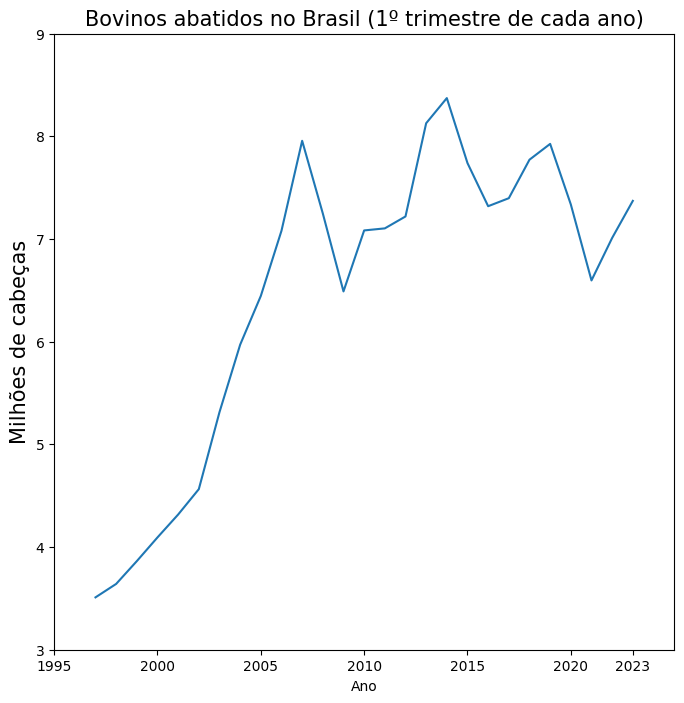

In [143]:
plt.figure(figsize=(8, 8))

x=x
y=y

# plotando
plt.plot(x,y)

# definir texto do título e eixos x e y

plt.title('Bovinos abatidos no Brasil (1º trimestre de cada ano)',fontsize="15")
plt.ylabel('Milhões de cabeças', fontsize="15")
plt.xlabel('Ano')

# estabelecendo a escala dos eixos x e y

plt.ylim(3,9)
plt.xlim(1995,2025)

eixo_y = [3,4,5,6,7,8,9]
plt.yticks(eixo_y)
plt.yticks(eixo_y, ['3','4', '5', '6', '7', '8', '9'])

eixo_x = [1995, 2000, 2005, 2010, 2015, 2020, 2023]
plt.xticks(eixo_x, ['1995', '2000', '2005', '2010', '2015', '2020', '2023'])

# alterando o tamanho

plt.xticks(fontsize="10")
plt.yticks(fontsize="10")

# plotar

plt.show()

In [144]:
df_bovinos_abatidos = df_bovinos_abatidos.transpose()

In [145]:
df_bovinos_abatidos = df_bovinos_abatidos.reset_index(drop=True)

In [146]:
df_bovinos_abatidos

,Ano,Bovinos abatidos (em milhões)
0,1997.0,3.510
1,1998.0,3.641
2,1999.0,3.863
3,2000.0,4.094
4,2001.0,4.317
5,2002.0,4.564
6,2003.0,5.314
7,2004.0,5.971
8,2005.0,6.446
9,2006.0,7.081


In [147]:
df_bovinos_abatidos.to_csv('../datasets/base_alterada_5_bovinosabatidos.csv', index=False)

Utilizando um dataset mais completo, conseguimos visualizar que o número de cabeças de gado abatidas em 2023 era praticamente o dobro do número de 1997.

Como foi possível visualizar no gráfico a respeito de desmatamento na Amazônia, o desmatamento relacionado à criação de pasto para gado é o principal fator a ser observado. Os dados a respeito da produção pecuária indicam que esta só cresce. Entendemos, então, que a produção pecuária, como acontece atualmente, é um fator de destaque para entender o desmatamento no Brasil, e portanto, o papel do nosso país na crise climática em um contexto global.

Além disso, pudemos ver que a produção agrícola é um fator importante. Passaremos agora a nossa análise para estas produções.

Utilizando as informações disponibilizadas pelo IBGE a respeito dos commodities agrícolas mais rentáveis de 2023 (https://www.ibge.gov.br/explica/producao-agropecuaria/), utilizamos o SIDRA (Sistema IBGE de Recuperação Automática) para adquirir dados a respeito de 2 produtos de lavouras em uma série histórica (a saber: soja e cana-de-açúcar), com os quais trabalharemos a seguir. A princípio pensamos em incluir também os dados relativos à produção de milho, mas os dados indicavam uma discrepância muito grande entre as lavouras, sendo a produção do milho significativamente menor do que as outras duas.

Os dados, na forma como são baixados no site, são difíceis de trabalhar, por questão de formatação. Ao tentar baixar as informações relativas aos 2 produtos de lavouras escolhidos, o resultado era um arquivo .csv difícil de trabalhar. Fizemos então o exercício de baixá-los separadamente para então fazer o merge em um único dataframe.

Para começar a lidar com eles, foi necessário baixá-los em formato .xlsx, abri-los em uma planilha no Google Sheets, apagar informações que estavam prejudicando a importação dos valores em um dataframe, salva-los como .csv para então importa-los.

Como os dados estavam discriminados por mês, o que poderia dificultar a análise, selecionamos apenas os dados relativos ao mês de fevereiro, dado que, após breve pesquisa, verificamos que parte das colheitas acontecem neste mês. Entendemos que o período das colheitas varia de acordo com a região do país, então qualquer análise dessas informações deve ser entendida no seu valor pedagógico de um exercício no contexto do estudo da programação.

Os dados podem ser encontrados em https://sidra.ibge.gov.br/tabela/6588.

Uma análise futura pode trabalhar com dados relativos ao plantio, a saber, analisando a área plantada ou colhida, procurando um apontamento direto entre desmatamento e área cultivada. Nos privaremos de fazer isto neste momento, porque entendemos que a análise, como está, já é extensa.

In [148]:
df_producao_soja = pd.read_csv("../datasets/base_original_6_producao_soja_fev.csv")

In [149]:
df_producao_soja = pd.DataFrame(df_producao_soja)

In [150]:
df_producao_soja

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,fevereiro 2007,fevereiro 2008,fevereiro 2009,fevereiro 2010,fevereiro 2011,fevereiro 2012,fevereiro 2013,fevereiro 2014,fevereiro 2015,fevereiro 2016,fevereiro 2017,fevereiro 2018,fevereiro 2019,fevereiro 2020,fevereiro 2021,fevereiro 2022,fevereiro 2023
1,56699617,59581364,57593978,66941524,68992950,67852740,83288808,88442511,94888440,101816438,108404791,113154525,113393434,125235188,130424395,123015134,145021020
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
# removendo string e transformando em valor numérico

for col in df_producao_soja.columns:
    df_producao_soja[col] = df_producao_soja[col].str.replace('fevereiro','')
    df_producao_soja[col] = pd.to_numeric(df_producao_soja[col])

In [152]:
# arredondando valores

df_producao_soja.iloc[1] = (df_producao_soja.iloc[1] / 1_000_000).round(3)

In [153]:
df_producao_soja

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2007.0,2008.000,2009.000,2010.000,2011.000,2012.000,2013.000,2014.000,2015.000,2016.000,2017.000,2018.000,2019.000,2020.000,2021.000,2022.000,2023.000
1,56.7,59.581,57.594,66.942,68.993,67.853,83.289,88.443,94.888,101.816,108.405,113.155,113.393,125.235,130.424,123.015,145.021
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
linhas_apagaveis = [2]

df_producao_soja = df_producao_soja.drop(index=linhas_apagaveis)

In [155]:
df_producao_soja = df_producao_soja.reset_index(drop=True)
df_producao_soja

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2007.0,2008.000,2009.000,2010.000,2011.000,2012.000,2013.000,2014.000,2015.000,2016.000,2017.000,2018.000,2019.000,2020.000,2021.000,2022.000,2023.000
1,56.7,59.581,57.594,66.942,68.993,67.853,83.289,88.443,94.888,101.816,108.405,113.155,113.393,125.235,130.424,123.015,145.021


In [156]:
y=df_producao_soja.iloc[1]
x=df_producao_soja.iloc[0]

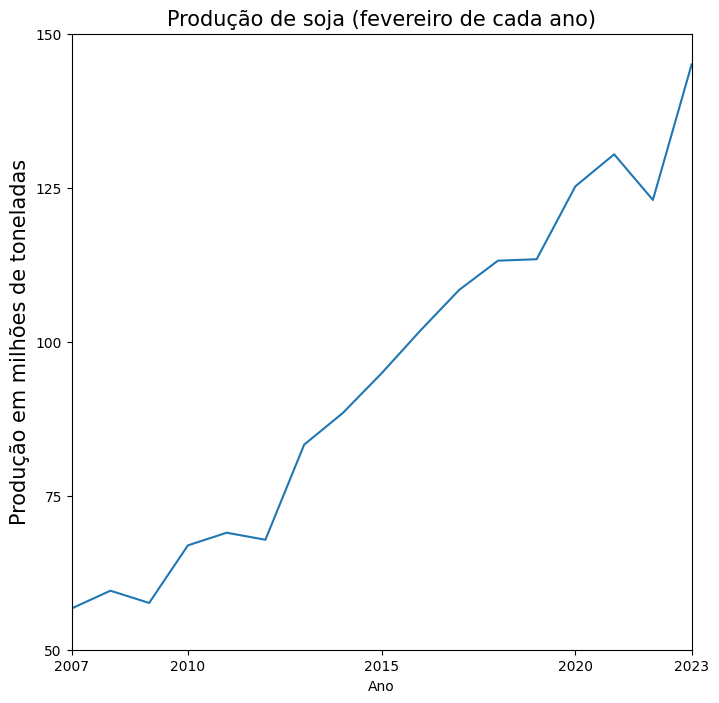

In [157]:
plt.figure(figsize=(8, 8))

x=x
y=y

# plotando
plt.plot(x,y)

# definir texto do título e eixos x e y

plt.title('Produção de soja (fevereiro de cada ano)',fontsize="15")
plt.ylabel('Produção em milhões de toneladas', fontsize="15")
plt.xlabel('Ano')

# estabelecendo a escala dos eixos x e y

plt.ylim(50,150)
plt.xlim(2007,2023)

eixo_y = [50,75,100,125,150]
plt.yticks(eixo_y)
plt.yticks(eixo_y, ['50', '75', '100', '125', '150'])

eixo_x = [2007, 2010, 2015, 2020, 2023]
plt.xticks(eixo_x, ['2007', '2010', '2015', '2020', '2023'])

# alterando o tamanho

plt.xticks(fontsize="10")
plt.yticks(fontsize="10")

# plotar

plt.show()

In [158]:
df_producao_cana = pd.read_csv("../datasets/base_original_7_producao_cana_fev.csv")

In [159]:
df_producao_cana = pd.DataFrame(df_producao_cana)

In [160]:
df_producao_cana

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,fevereiro 2007,fevereiro 2008,fevereiro 2009,fevereiro 2010,fevereiro 2011,fevereiro 2012,fevereiro 2013,fevereiro 2014,fevereiro 2015,fevereiro 2016,fevereiro 2017,fevereiro 2018,fevereiro 2019,fevereiro 2020,fevereiro 2021,fevereiro 2022,fevereiro 2023
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,489957366,549978039,660659297,700123394,661440091,741165845,738376461,743106177,672624349,722339584,721571892,672689200,665127669,674293146,667445108,734626175,634041314


In [161]:
for col in df_producao_cana.columns:
    df_producao_cana[col] = df_producao_cana[col].str.replace('fevereiro','')
    df_producao_cana[col] = pd.to_numeric(df_producao_cana[col])

In [162]:
df_producao_cana.iloc[2] = (df_producao_cana.iloc[2] / 1_000_000).round(3)

In [163]:
linhas_apagaveis = [1]

df_producao_cana = df_producao_cana.drop(index=linhas_apagaveis)

In [164]:
df_producao_cana = df_producao_cana.reset_index(drop=True)
df_producao_cana

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2007.000,2008.000,2009.000,2010.000,2011.00,2012.000,2013.000,2014.000,2015.000,2016.00,2017.000,2018.000,2019.000,2020.000,2021.000,2022.000,2023.000
1,489.957,549.978,660.659,700.123,661.44,741.166,738.376,743.106,672.624,722.34,721.572,672.689,665.128,674.293,667.445,734.626,634.041


In [165]:
y=df_producao_cana.iloc[1]
x=df_producao_cana.iloc[0]

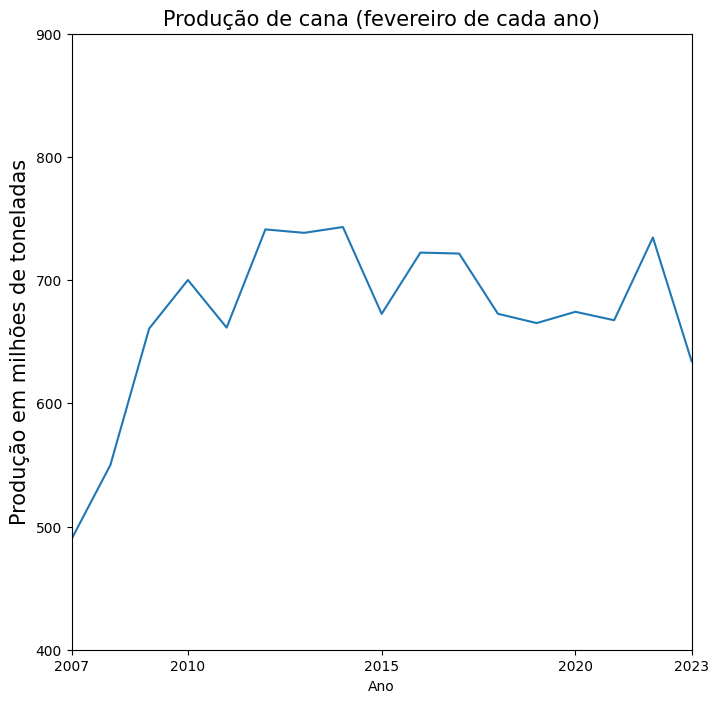

In [166]:
plt.figure(figsize=(8, 8))

x=x
y=y

# plotando
plt.plot(x,y)

# definir texto do título e eixos x e y

plt.title('Produção de cana (fevereiro de cada ano)',fontsize="15")
plt.ylabel('Produção em milhões de toneladas', fontsize="15")
plt.xlabel('Ano')

# estabelecendo a escala dos eixos x e y

plt.ylim(400,900)
plt.xlim(2007,2023)

eixo_y = [400,500,600,700,800,900]
plt.yticks(eixo_y)
plt.yticks(eixo_y, ['400', '500', '600', '700', '800', '900'])

eixo_x = [2007, 2010, 2015, 2020, 2023]
plt.xticks(eixo_x, ['2007', '2010', '2015', '2020', '2023'])

# alterando o tamanho

plt.xticks(fontsize="10")
plt.yticks(fontsize="10")

# plotar

plt.show()

In [167]:
df_duas_lavouras = pd.concat([df_producao_soja, df_producao_cana], ignore_index=True)

In [168]:
df_duas_lavouras

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2007.000,2008.000,2009.000,2010.000,2011.000,2012.000,2013.000,2014.000,2015.000,2016.000,2017.000,2018.000,2019.000,2020.000,2021.000,2022.000,2023.000
1,56.700,59.581,57.594,66.942,68.993,67.853,83.289,88.443,94.888,101.816,108.405,113.155,113.393,125.235,130.424,123.015,145.021
2,2007.000,2008.000,2009.000,2010.000,2011.000,2012.000,2013.000,2014.000,2015.000,2016.000,2017.000,2018.000,2019.000,2020.000,2021.000,2022.000,2023.000
3,489.957,549.978,660.659,700.123,661.440,741.166,738.376,743.106,672.624,722.340,721.572,672.689,665.128,674.293,667.445,734.626,634.041


In [169]:
linhas_apagaveis = [2]

df_duas_lavouras = df_duas_lavouras.drop(index=linhas_apagaveis)

In [170]:
df_duas_lavouras = df_duas_lavouras.reset_index(drop=True)

In [171]:
novo_nome_ano = 'Ano'
df_duas_lavouras.rename(index={0: novo_nome_ano}, inplace=True)

In [172]:
novo_nome_valor = 'Produção de soja (em milhões de toneladas)'
df_duas_lavouras.rename(index={1: novo_nome_valor}, inplace=True)

In [173]:
novo_nome_valor_2 = 'Produção de cana (em milhões de toneladas)'
df_duas_lavouras.rename(index={2: novo_nome_valor_2}, inplace=True)

In [174]:
df_duas_lavouras = df_duas_lavouras.transpose()

In [175]:
df_duas_lavouras

,Ano,Produção de soja (em milhões de toneladas),Produção de cana (em milhões de toneladas)
Unnamed: 0,2007.0,56.700,489.957
Unnamed: 1,2008.0,59.581,549.978
Unnamed: 2,2009.0,57.594,660.659
Unnamed: 3,2010.0,66.942,700.123
Unnamed: 4,2011.0,68.993,661.440
Unnamed: 5,2012.0,67.853,741.166
Unnamed: 6,2013.0,83.289,738.376
Unnamed: 7,2014.0,88.443,743.106
Unnamed: 8,2015.0,94.888,672.624
Unnamed: 9,2016.0,101.816,722.340


In [176]:
x = df_duas_lavouras['Ano']

cana = df_duas_lavouras['Produção de cana (em milhões de toneladas)'].to_numpy()
soja = df_duas_lavouras['Produção de soja (em milhões de toneladas)'].to_numpy()

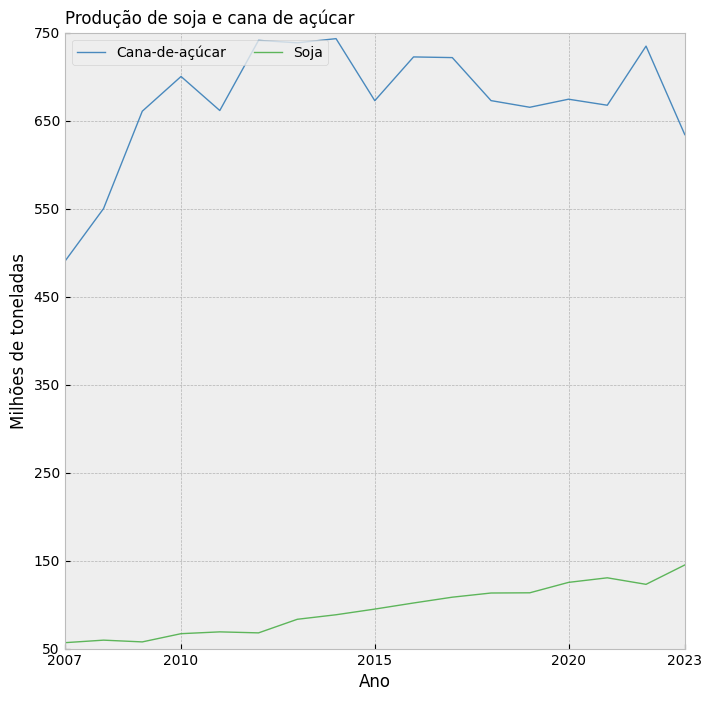

In [177]:
plt.figure(figsize=(8, 8))

plotando_df_duas_lavouras = pd.DataFrame({
    'x': x,
    'Cana-de-açúcar': cana, 
    'Soja': soja
})

# escolhendo o estilo do mapa
plt.style.use('bmh')

# definindo a paleta
palette = plt.get_cmap('Set1')

# criando um laço for para plotar duas linhas
num = 0
for column in plotando_df_duas_lavouras.drop('x', axis=1):
    num += 1
    color = palette(num)
    plt.plot(plotando_df_duas_lavouras['x'], plotando_df_duas_lavouras[column], color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)

# estabelecendo a escala dos eixos x e y

plt.ylim(50,750)
plt.xlim(2007,2023)

eixo_y = [50,150,250,350,450,550,650,750]
plt.yticks(eixo_y)
plt.yticks(eixo_y, ['50','150','250','350','450','550','650','750'])

eixo_x = [2007, 2010, 2015, 2020, 2023]
plt.xticks(eixo_x, ['2007', '2010', '2015', '2020', '2023'])

# alterando o tamanho

plt.xticks(fontsize="10")
plt.yticks(fontsize="10")

plt.title("Produção de soja e cana de açúcar", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Ano")
plt.ylabel("Milhões de toneladas")

plt.show()

In [178]:
df_duas_lavouras

,Ano,Produção de soja (em milhões de toneladas),Produção de cana (em milhões de toneladas)
Unnamed: 0,2007.0,56.700,489.957
Unnamed: 1,2008.0,59.581,549.978
Unnamed: 2,2009.0,57.594,660.659
Unnamed: 3,2010.0,66.942,700.123
Unnamed: 4,2011.0,68.993,661.440
Unnamed: 5,2012.0,67.853,741.166
Unnamed: 6,2013.0,83.289,738.376
Unnamed: 7,2014.0,88.443,743.106
Unnamed: 8,2015.0,94.888,672.624
Unnamed: 9,2016.0,101.816,722.340


Como é possível observar, a produção agrícola destes dois insumos viu um significativo crescimento nas últimas duas décadas, principalmente no que diz respeito à produção de soja, que quase triplicou.

In [179]:
df_duas_lavouras.to_csv('../datasets/base_alterada_6_lavouras_soja_e_cana.csv', index=False)

Nossa análise agora se voltará para o papel que uma dessas lavouras, a soja, desempenha nas exportações.

E por que pegar dados relativos à exportação? 

Segundo dados organizados pelo CONAB (Companhia Nacional de Abastecimento), até o começo da década de 2010, a maior parte da produção de soja era destinada para o consumo interno. A partir de uma maior demanda vinda do mercado externo, a lógica se inverte, e o Brasil passa a concentrar a maior parte da produção de soja para o exterior.

Os dados podem ser encontrados em: "Complexo da Soja: Análise dos dados nacionais e internacionais" (2019)

https://thetricontinental.org/pt-pt/brasil/complexo-da-soja-analise-dos-dados-nacionais-e-internacionais/

In [180]:
df_import_export = pd.read_csv("../datasets/base_original_8_importacao_exportacao_soja.csv")
df_import_export = pd.DataFrame(df_import_export)
df_import_export

,Safra,Estoque Inicial,Produção,Importação,Consumo,Exportação,Estoque Final
0,2018,1.391,115.018,150.000,45.200,68.000,3.359
1,2017,7.780,119.282,187.000,42.600,83.258,1.391
2,2016,5.405,114.075,254.000,43.800,68.155,7.780
3,2015,2.671,95.435,382.000,41.500,51.582,5.405
4,2014,2.943,96.228,324.000,42.500,54.324,2.671
5,2013,1.535,86.121,579.000,39.600,45.692,2.943
6,2012,745.000,81.499,283.000,38.200,42.792,1.535
7,2011,3.307,66.383,267.000,36.754,32.458,745.000
8,2010,2.888,75.324,41.000,41.970,32.976,3.307
9,2009,955.000,68.688,118.000,37.800,29.073,2.888


In [181]:
x = df_import_export['Safra']

consumo_interno = df_import_export['Consumo']
exportacao = df_import_export['Exportação']

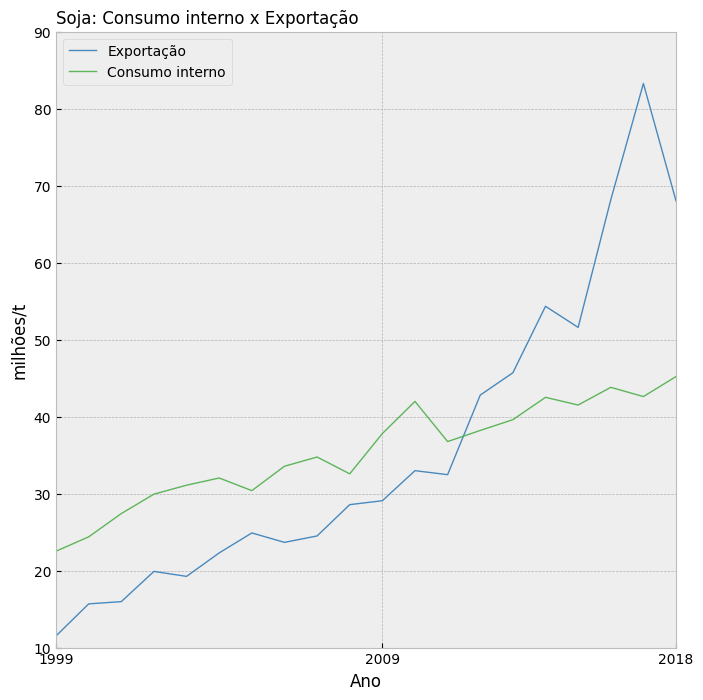

In [182]:
plt.figure(figsize=(8, 8))

df_import_export = pd.DataFrame({
    'x': x,
    'Exportação': exportacao,
    'Consumo interno': consumo_interno
})

# escolhendo o estilo do mapa
plt.style.use('bmh')

# definindo a paleta
palette = plt.get_cmap('Set1')

# criando um laço for para plotar múltiplas linhas
num = 0
for column in df_import_export.drop('x', axis=1):
    num += 1
    color = palette(num)
    plt.plot (df_import_export['x'], df_import_export[column], color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)

# estabelecendo a escala dos eixos x e y

plt.ylim(10,90)
plt.xlim(1999,2018)

eixo_y = [10,20,30,40,50,60,70,80,90]
plt.yticks(eixo_y)
plt.yticks(eixo_y, ['10','20','30','40','50','60','70','80','90'])

eixo_x = [1999, 2009, 2018]
plt.xticks(eixo_x, ['1999', '2009', '2018'])

# alterando o tamanho

plt.xticks(fontsize="10")
plt.yticks(fontsize="10")

plt.legend(fontsize="10", loc='upper left')

plt.title("Soja: Consumo interno x Exportação", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Ano")
plt.ylabel("milhões/t")

plt.show()

O gráfico explicita que hoje o Brasil produz soja sobretudo para o mercado externo, e não para abastecer o seu consumo interno. 

In [183]:
df_import_export.columns.values[0] = 'Safra'

In [184]:
df_import_export.columns.values[1] = 'Exportação (em milhões de toneladas)'

In [185]:
df_import_export.columns.values[2] = 'Consumo interno (em milhões de toneladas)'

In [186]:
df_import_export

,Safra,Exportação (em milhões de toneladas),Consumo interno (em milhões de toneladas)
0,2018,68.000,45.200
1,2017,83.258,42.600
2,2016,68.155,43.800
3,2015,51.582,41.500
4,2014,54.324,42.500
5,2013,45.692,39.600
6,2012,42.792,38.200
7,2011,32.458,36.754
8,2010,32.976,41.970
9,2009,29.073,37.800


In [187]:
df_import_export.to_csv('../datasets/base_alterada_7_perfil_da_soja.csv', index=True)

Trabalharemos agora com dados que dão ideia da dimensão econômica que a produção agropecuária tem nas exportações de produtos.

Os dados são do Ministério da indústria, comércio exterior e serviços (Comex Stat - Exportação e Importação Geral) e podem ser encontrados em: http://comexstat.mdic.gov.br/pt/geral/86263

In [188]:
df_exportacoes = pd.read_csv("../datasets/base_original_9_dados_exportacoes.csv")
df_exportacoes = pd.DataFrame(df_exportacoes)
df_exportacoes

,Código ISIC Divisão,Descrição ISIC Divisão,Código ISIC Grupo,Descrição ISIC Grupo,2023 - Valor FOB (US$),2022 - Valor FOB (US$),2021 - Valor FOB (US$),2020 - Valor FOB (US$),2019 - Valor FOB (US$),2018 - Valor FOB (US$),2017 - Valor FOB (US$),2016 - Valor FOB (US$),2015 - Valor FOB (US$),2014 - Valor FOB (US$),2013 - Valor FOB (US$),2012 - Valor FOB (US$)
0,1,"Produção vegetal, animal e caça",11,Cultivo de culturas não perenes,62815549611,64540513780,47573932808,38773589890,36965805102,39616086397,32522738873,25059385406,28342081548,29394524465,31217977605,26148056264
1,6,Extração de petróleo bruto e gás natural,61,Extração de petróleo bruto,34429413686,42553765476,30608981810,19613858122,24199543508,25251320216,16625024187,10073833667,11781339568,16356806244,12956678789,20289442467
2,7,Extração de minerais metálicos,71,Mineração de minérios de ferro,24418592079,28924344223,44660647772,25780485523,22680986806,20220359432,19199154200,13289340776,14037103623,25819090176,32491530731,30989292505
3,10,Fabricação de produtos alimentícios,101,Processamento e conservação de carne,20093317142,26214382366,20268962832,17509609475,17017056362,14969890432,15712334894,14387902781,14858275563,17543153927,16963976083,15862710375
4,10,Fabricação de produtos alimentícios,107,Fabricação de outros produtos alimentícios,14086810561,13664140403,11399641323,10715074414,7209663799,8465285161,13448378464,12411805521,9613326262,11491038407,13946378095,15005775383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,5,Mineração de carvão e lignito,52,Mineração de lignito,43212,77421,57488,48328,43398,12350,13429,16424,30335,116758,0,0
90,74,"Outras atividades profissionais, científicas e...",742,Atividades fotográficas,20034,18295,45180,266031,305600,340091,232260,322695,232480,135220,783,718
91,35,"Fornecimento de eletricidade, gás, vapor e ar ...",352,Fabricação de gás; distribuição de combustívei...,2640,2580,0,0,0,0,0,0,1,0,1835,0
92,59,"Produção de filmes, vídeos e programas de tele...",591,"Atividades de filmes, vídeos e programas de te...",0,0,0,0,12000,258,866,0,401,218341,26972,4492


In [189]:
# ordenando os valores de maneira decrescente para entender quais os produtos mais exportados

df_exportacoes = df_exportacoes.sort_values('2023 - Valor FOB (US$)', ascending=False)

In [190]:
df_exportacoes.head(10)

,Código ISIC Divisão,Descrição ISIC Divisão,Código ISIC Grupo,Descrição ISIC Grupo,2023 - Valor FOB (US$),2022 - Valor FOB (US$),2021 - Valor FOB (US$),2020 - Valor FOB (US$),2019 - Valor FOB (US$),2018 - Valor FOB (US$),2017 - Valor FOB (US$),2016 - Valor FOB (US$),2015 - Valor FOB (US$),2014 - Valor FOB (US$),2013 - Valor FOB (US$),2012 - Valor FOB (US$)
0,1,"Produção vegetal, animal e caça",11,Cultivo de culturas não perenes,62815549611,64540513780,47573932808,38773589890,36965805102,39616086397,32522738873,25059385406,28342081548,29394524465,31217977605,26148056264
1,6,Extração de petróleo bruto e gás natural,61,Extração de petróleo bruto,34429413686,42553765476,30608981810,19613858122,24199543508,25251320216,16625024187,10073833667,11781339568,16356806244,12956678789,20289442467
2,7,Extração de minerais metálicos,71,Mineração de minérios de ferro,24418592079,28924344223,44660647772,25780485523,22680986806,20220359432,19199154200,13289340776,14037103623,25819090176,32491530731,30989292505
3,10,Fabricação de produtos alimentícios,101,Processamento e conservação de carne,20093317142,26214382366,20268962832,17509609475,17017056362,14969890432,15712334894,14387902781,14858275563,17543153927,16963976083,15862710375
4,10,Fabricação de produtos alimentícios,107,Fabricação de outros produtos alimentícios,14086810561,13664140403,11399641323,10715074414,7209663799,8465285161,13448378464,12411805521,9613326262,11491038407,13946378095,15005775383
5,24,Fabricação de metais básicos,241,Fabricação básica de ferro e aço,13217101021,17297710055,14423609676,8999373352,11460716817,12529810361,11228620804,8159194009,9351969445,10205597511,8894897174,10965487720
6,10,Fabricação de produtos alimentícios,104,Fabricação de óleos e gorduras vegetais e animais,12673379151,15088769365,9913585740,7053457324,6833057366,7927805331,6349846106,6407495788,7388254326,8519388942,8553002108,9076831571
7,19,Fabricação de coque e produtos petrolíferos re...,192,Fabricação de produtos petrolíferos refinados,10220831591,13584495144,7604133715,5202922080,6063325484,4294034734,2002023636,1354255142,1917118695,4171365309,4795734626,5583602660
8,17,Fabricação de papel e produtos de papel,170,Fabricação de papel e produtos de papel,8578155315,11114001751,8672232386,7765146432,9513765936,10308179296,8299087127,7490508291,7692356782,7258441375,7204221295,6712088055
9,29,"Fabricação de veículos automóveis, reboques e ...",291,Fabricação de veículos automotores,7712910241,9145359224,6716819569,5511451122,7223637846,10101505086,11872180353,8724216905,6973694202,6786331311,10388405709,8499196090


In [191]:
# selecionando as maiores exportações

top10_exportacoes = df_exportacoes.loc[0:9]

In [192]:
top10_exportacoes

,Código ISIC Divisão,Descrição ISIC Divisão,Código ISIC Grupo,Descrição ISIC Grupo,2023 - Valor FOB (US$),2022 - Valor FOB (US$),2021 - Valor FOB (US$),2020 - Valor FOB (US$),2019 - Valor FOB (US$),2018 - Valor FOB (US$),2017 - Valor FOB (US$),2016 - Valor FOB (US$),2015 - Valor FOB (US$),2014 - Valor FOB (US$),2013 - Valor FOB (US$),2012 - Valor FOB (US$)
0,1,"Produção vegetal, animal e caça",11,Cultivo de culturas não perenes,62815549611,64540513780,47573932808,38773589890,36965805102,39616086397,32522738873,25059385406,28342081548,29394524465,31217977605,26148056264
1,6,Extração de petróleo bruto e gás natural,61,Extração de petróleo bruto,34429413686,42553765476,30608981810,19613858122,24199543508,25251320216,16625024187,10073833667,11781339568,16356806244,12956678789,20289442467
2,7,Extração de minerais metálicos,71,Mineração de minérios de ferro,24418592079,28924344223,44660647772,25780485523,22680986806,20220359432,19199154200,13289340776,14037103623,25819090176,32491530731,30989292505
3,10,Fabricação de produtos alimentícios,101,Processamento e conservação de carne,20093317142,26214382366,20268962832,17509609475,17017056362,14969890432,15712334894,14387902781,14858275563,17543153927,16963976083,15862710375
4,10,Fabricação de produtos alimentícios,107,Fabricação de outros produtos alimentícios,14086810561,13664140403,11399641323,10715074414,7209663799,8465285161,13448378464,12411805521,9613326262,11491038407,13946378095,15005775383
5,24,Fabricação de metais básicos,241,Fabricação básica de ferro e aço,13217101021,17297710055,14423609676,8999373352,11460716817,12529810361,11228620804,8159194009,9351969445,10205597511,8894897174,10965487720
6,10,Fabricação de produtos alimentícios,104,Fabricação de óleos e gorduras vegetais e animais,12673379151,15088769365,9913585740,7053457324,6833057366,7927805331,6349846106,6407495788,7388254326,8519388942,8553002108,9076831571
7,19,Fabricação de coque e produtos petrolíferos re...,192,Fabricação de produtos petrolíferos refinados,10220831591,13584495144,7604133715,5202922080,6063325484,4294034734,2002023636,1354255142,1917118695,4171365309,4795734626,5583602660
8,17,Fabricação de papel e produtos de papel,170,Fabricação de papel e produtos de papel,8578155315,11114001751,8672232386,7765146432,9513765936,10308179296,8299087127,7490508291,7692356782,7258441375,7204221295,6712088055
9,29,"Fabricação de veículos automóveis, reboques e ...",291,Fabricação de veículos automotores,7712910241,9145359224,6716819569,5511451122,7223637846,10101505086,11872180353,8724216905,6973694202,6786331311,10388405709,8499196090


In [193]:
# a renomeação das colunas aqui merece um pouco de atenção
# já que há parênteses (que são considerados caracteres especiais), 
# é necessário o uso da barra '\'
# para que a expressão seja lida da maneira desejada

top10_exportacoes.columns = top10_exportacoes.columns.str.replace(' - Valor FOB \(US\$\)', '', regex=True)


In [194]:
# nossa tabela está bem organizada, mas será necessário mover alguns elementos de lugar para plotar um gráfico

top10_exportacoes

,Código ISIC Divisão,Descrição ISIC Divisão,Código ISIC Grupo,Descrição ISIC Grupo,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
0,1,"Produção vegetal, animal e caça",11,Cultivo de culturas não perenes,62815549611,64540513780,47573932808,38773589890,36965805102,39616086397,32522738873,25059385406,28342081548,29394524465,31217977605,26148056264
1,6,Extração de petróleo bruto e gás natural,61,Extração de petróleo bruto,34429413686,42553765476,30608981810,19613858122,24199543508,25251320216,16625024187,10073833667,11781339568,16356806244,12956678789,20289442467
2,7,Extração de minerais metálicos,71,Mineração de minérios de ferro,24418592079,28924344223,44660647772,25780485523,22680986806,20220359432,19199154200,13289340776,14037103623,25819090176,32491530731,30989292505
3,10,Fabricação de produtos alimentícios,101,Processamento e conservação de carne,20093317142,26214382366,20268962832,17509609475,17017056362,14969890432,15712334894,14387902781,14858275563,17543153927,16963976083,15862710375
4,10,Fabricação de produtos alimentícios,107,Fabricação de outros produtos alimentícios,14086810561,13664140403,11399641323,10715074414,7209663799,8465285161,13448378464,12411805521,9613326262,11491038407,13946378095,15005775383
5,24,Fabricação de metais básicos,241,Fabricação básica de ferro e aço,13217101021,17297710055,14423609676,8999373352,11460716817,12529810361,11228620804,8159194009,9351969445,10205597511,8894897174,10965487720
6,10,Fabricação de produtos alimentícios,104,Fabricação de óleos e gorduras vegetais e animais,12673379151,15088769365,9913585740,7053457324,6833057366,7927805331,6349846106,6407495788,7388254326,8519388942,8553002108,9076831571
7,19,Fabricação de coque e produtos petrolíferos re...,192,Fabricação de produtos petrolíferos refinados,10220831591,13584495144,7604133715,5202922080,6063325484,4294034734,2002023636,1354255142,1917118695,4171365309,4795734626,5583602660
8,17,Fabricação de papel e produtos de papel,170,Fabricação de papel e produtos de papel,8578155315,11114001751,8672232386,7765146432,9513765936,10308179296,8299087127,7490508291,7692356782,7258441375,7204221295,6712088055
9,29,"Fabricação de veículos automóveis, reboques e ...",291,Fabricação de veículos automotores,7712910241,9145359224,6716819569,5511451122,7223637846,10101505086,11872180353,8724216905,6973694202,6786331311,10388405709,8499196090


In [195]:
# começamos transpondo as linhas e colunas

top10_exportacoes = top10_exportacoes.transpose()

In [196]:
# resetando o index para localizar a coluna que desejamos alterar

top10_exportacoes = top10_exportacoes.reset_index(drop=False)

In [197]:
top10_exportacoes

,index,0,1,2,3,4,5,6,7,8,9
0,Código ISIC Divisão,1,6,7,10,10,24,10,19,17,29
1,Descrição ISIC Divisão,"Produção vegetal, animal e caça",Extração de petróleo bruto e gás natural,Extração de minerais metálicos,Fabricação de produtos alimentícios,Fabricação de produtos alimentícios,Fabricação de metais básicos,Fabricação de produtos alimentícios,Fabricação de coque e produtos petrolíferos re...,Fabricação de papel e produtos de papel,"Fabricação de veículos automóveis, reboques e ..."
2,Código ISIC Grupo,11,61,71,101,107,241,104,192,170,291
3,Descrição ISIC Grupo,Cultivo de culturas não perenes,Extração de petróleo bruto,Mineração de minérios de ferro,Processamento e conservação de carne,Fabricação de outros produtos alimentícios,Fabricação básica de ferro e aço,Fabricação de óleos e gorduras vegetais e animais,Fabricação de produtos petrolíferos refinados,Fabricação de papel e produtos de papel,Fabricação de veículos automotores
4,2023,62815549611,34429413686,24418592079,20093317142,14086810561,13217101021,12673379151,10220831591,8578155315,7712910241
5,2022,64540513780,42553765476,28924344223,26214382366,13664140403,17297710055,15088769365,13584495144,11114001751,9145359224
6,2021,47573932808,30608981810,44660647772,20268962832,11399641323,14423609676,9913585740,7604133715,8672232386,6716819569
7,2020,38773589890,19613858122,25780485523,17509609475,10715074414,8999373352,7053457324,5202922080,7765146432,5511451122
8,2019,36965805102,24199543508,22680986806,17017056362,7209663799,11460716817,6833057366,6063325484,9513765936,7223637846
9,2018,39616086397,25251320216,20220359432,14969890432,8465285161,12529810361,7927805331,4294034734,10308179296,10101505086


In [198]:
# testando a localização de colunas por meio de índices

top10_exportacoes['index']

0        Código ISIC Divisão
1     Descrição ISIC Divisão
2          Código ISIC Grupo
3       Descrição ISIC Grupo
4                       2023
5                       2022
6                       2021
7                       2020
8                       2019
9                       2018
10                      2017
11                      2016
12                      2015
13                      2014
14                      2013
15                      2012
Name: index, dtype: object

In [199]:
top10_exportacoes[0]

0                                   1
1     Produção vegetal, animal e caça
2                                  11
3     Cultivo de culturas não perenes
4                         62815549611
5                         64540513780
6                         47573932808
7                         38773589890
8                         36965805102
9                         39616086397
10                        32522738873
11                        25059385406
12                        28342081548
13                        29394524465
14                        31217977605
15                        26148056264
Name: 0, dtype: object

In [200]:
# para localizar valores desconsiderando as linhas 0-3, usamos a função iloc
# quando rodamos a função percebemos que ele está considerando índices diferentes
# da representação do df acima
# mas não há problema, basta usar n+1 (onde n é o índice tal qual aparece na representação do DF acima)

top10_exportacoes.iloc[4:16, 1]

# vamos desconsiderar as linhas 0-3 em um slice do DF
# para não nos perdermos, vamos renomear as colunas utilizando seus índices

4     62815549611
5     64540513780
6     47573932808
7     38773589890
8     36965805102
9     39616086397
10    32522738873
11    25059385406
12    28342081548
13    29394524465
14    31217977605
15    26148056264
Name: 0, dtype: object

In [201]:
top10_exportacoes.iloc[4:16]

,index,0,1,2,3,4,5,6,7,8,9
4,2023,62815549611,34429413686,24418592079,20093317142,14086810561,13217101021,12673379151,10220831591,8578155315,7712910241
5,2022,64540513780,42553765476,28924344223,26214382366,13664140403,17297710055,15088769365,13584495144,11114001751,9145359224
6,2021,47573932808,30608981810,44660647772,20268962832,11399641323,14423609676,9913585740,7604133715,8672232386,6716819569
7,2020,38773589890,19613858122,25780485523,17509609475,10715074414,8999373352,7053457324,5202922080,7765146432,5511451122
8,2019,36965805102,24199543508,22680986806,17017056362,7209663799,11460716817,6833057366,6063325484,9513765936,7223637846
9,2018,39616086397,25251320216,20220359432,14969890432,8465285161,12529810361,7927805331,4294034734,10308179296,10101505086
10,2017,32522738873,16625024187,19199154200,15712334894,13448378464,11228620804,6349846106,2002023636,8299087127,11872180353
11,2016,25059385406,10073833667,13289340776,14387902781,12411805521,8159194009,6407495788,1354255142,7490508291,8724216905
12,2015,28342081548,11781339568,14037103623,14858275563,9613326262,9351969445,7388254326,1917118695,7692356782,6973694202
13,2014,29394524465,16356806244,25819090176,17543153927,11491038407,10205597511,8519388942,4171365309,7258441375,6786331311


In [202]:
# renomeando colunas

top10_exportacoes.columns.values[1] = 'Cultivo de culturas não perenes'
top10_exportacoes.columns.values[2] = 'Extração de petróleo bruto'
top10_exportacoes.columns.values[3] = 'Mineração de minérios de ferro'
top10_exportacoes.columns.values[4] = 'Processamento e conservação de carne'
top10_exportacoes.columns.values[5] = 'Fabricação de outros produtos alimentícios'
top10_exportacoes.columns.values[6] = 'Fabricação básica de ferro e aço'
top10_exportacoes.columns.values[7] = 'Fabricação de óleos e gorduras vegetais e animais'
top10_exportacoes.columns.values[8] = 'Fabricação de produtos petrolíferos refinados'
top10_exportacoes.columns.values[9] = 'Fabricação de papel e produtos de papel'
top10_exportacoes.columns.values[10] = 'Fabricação de veículos automotores'

In [203]:
# fazendo um slice do dataset

top10_exportacoes = top10_exportacoes.iloc[4:16]

In [204]:
top10_exportacoes

,index,Cultivo de culturas não perenes,Extração de petróleo bruto,Mineração de minérios de ferro,Processamento e conservação de carne,Fabricação de outros produtos alimentícios,Fabricação básica de ferro e aço,Fabricação de óleos e gorduras vegetais e animais,Fabricação de produtos petrolíferos refinados,Fabricação de papel e produtos de papel,Fabricação de veículos automotores
4,2023,62815549611,34429413686,24418592079,20093317142,14086810561,13217101021,12673379151,10220831591,8578155315,7712910241
5,2022,64540513780,42553765476,28924344223,26214382366,13664140403,17297710055,15088769365,13584495144,11114001751,9145359224
6,2021,47573932808,30608981810,44660647772,20268962832,11399641323,14423609676,9913585740,7604133715,8672232386,6716819569
7,2020,38773589890,19613858122,25780485523,17509609475,10715074414,8999373352,7053457324,5202922080,7765146432,5511451122
8,2019,36965805102,24199543508,22680986806,17017056362,7209663799,11460716817,6833057366,6063325484,9513765936,7223637846
9,2018,39616086397,25251320216,20220359432,14969890432,8465285161,12529810361,7927805331,4294034734,10308179296,10101505086
10,2017,32522738873,16625024187,19199154200,15712334894,13448378464,11228620804,6349846106,2002023636,8299087127,11872180353
11,2016,25059385406,10073833667,13289340776,14387902781,12411805521,8159194009,6407495788,1354255142,7490508291,8724216905
12,2015,28342081548,11781339568,14037103623,14858275563,9613326262,9351969445,7388254326,1917118695,7692356782,6973694202
13,2014,29394524465,16356806244,25819090176,17543153927,11491038407,10205597511,8519388942,4171365309,7258441375,6786331311


In [205]:
# após rodar uma função dtypes, verificamos que os dados são do tipo objeto, então precisamos converter

top10_exportacoes.dtypes

index                                                object
Cultivo de culturas não perenes                      object
Extração de petróleo bruto                           object
Mineração de minérios de ferro                       object
Processamento e conservação de carne                 object
Fabricação de outros produtos alimentícios           object
Fabricação básica de ferro e aço                     object
Fabricação de óleos e gorduras vegetais e animais    object
Fabricação de produtos petrolíferos refinados        object
Fabricação de papel e produtos de papel              object
Fabricação de veículos automotores                   object
dtype: object

In [206]:
# vamos criar uma variável temporária "teste" para conferir se conseguimos transformar os valores em bilhões

top10_exportacoes_teste = top10_exportacoes.astype(float)

In [207]:
top10_exportacoes_teste

,index,Cultivo de culturas não perenes,Extração de petróleo bruto,Mineração de minérios de ferro,Processamento e conservação de carne,Fabricação de outros produtos alimentícios,Fabricação básica de ferro e aço,Fabricação de óleos e gorduras vegetais e animais,Fabricação de produtos petrolíferos refinados,Fabricação de papel e produtos de papel,Fabricação de veículos automotores
4,2023.0,6.281555e+10,3.442941e+10,2.441859e+10,2.009332e+10,1.408681e+10,1.321710e+10,1.267338e+10,1.022083e+10,8.578155e+09,7.712910e+09
5,2022.0,6.454051e+10,4.255377e+10,2.892434e+10,2.621438e+10,1.366414e+10,1.729771e+10,1.508877e+10,1.358450e+10,1.111400e+10,9.145359e+09
6,2021.0,4.757393e+10,3.060898e+10,4.466065e+10,2.026896e+10,1.139964e+10,1.442361e+10,9.913586e+09,7.604134e+09,8.672232e+09,6.716820e+09
7,2020.0,3.877359e+10,1.961386e+10,2.578049e+10,1.750961e+10,1.071507e+10,8.999373e+09,7.053457e+09,5.202922e+09,7.765146e+09,5.511451e+09
8,2019.0,3.696581e+10,2.419954e+10,2.268099e+10,1.701706e+10,7.209664e+09,1.146072e+10,6.833057e+09,6.063325e+09,9.513766e+09,7.223638e+09
9,2018.0,3.961609e+10,2.525132e+10,2.022036e+10,1.496989e+10,8.465285e+09,1.252981e+10,7.927805e+09,4.294035e+09,1.030818e+10,1.010151e+10
10,2017.0,3.252274e+10,1.662502e+10,1.919915e+10,1.571233e+10,1.344838e+10,1.122862e+10,6.349846e+09,2.002024e+09,8.299087e+09,1.187218e+10
11,2016.0,2.505939e+10,1.007383e+10,1.328934e+10,1.438790e+10,1.241181e+10,8.159194e+09,6.407496e+09,1.354255e+09,7.490508e+09,8.724217e+09
12,2015.0,2.834208e+10,1.178134e+10,1.403710e+10,1.485828e+10,9.613326e+09,9.351969e+09,7.388254e+09,1.917119e+09,7.692357e+09,6.973694e+09
13,2014.0,2.939452e+10,1.635681e+10,2.581909e+10,1.754315e+10,1.149104e+10,1.020560e+10,8.519389e+09,4.171365e+09,7.258441e+09,6.786331e+09


In [208]:
# transformando os valores em bilhões

top10_exportacoes_teste[0] = (top10_exportacoes_teste[0] / 1_000_000_000).round()
top10_exportacoes_teste[1] = (top10_exportacoes_teste[1] / 1_000_000_000).round()
top10_exportacoes_teste[2] = (top10_exportacoes_teste[2] / 1_000_000_000).round()
top10_exportacoes_teste[3] = (top10_exportacoes_teste[3] / 1_000_000_000).round()
top10_exportacoes_teste[4] = (top10_exportacoes_teste[4] / 1_000_000_000).round()
top10_exportacoes_teste[5] = (top10_exportacoes_teste[5] / 1_000_000_000).round()
top10_exportacoes_teste[6] = (top10_exportacoes_teste[6] / 1_000_000_000).round()
top10_exportacoes_teste[7] = (top10_exportacoes_teste[7] / 1_000_000_000).round()
top10_exportacoes_teste[8] = (top10_exportacoes_teste[8] / 1_000_000_000).round()
top10_exportacoes_teste[9] = (top10_exportacoes_teste[9] / 1_000_000_000).round()

In [209]:
# atribuindo os valores da variável de teste na variável anterior

top10_exportacoes = top10_exportacoes_teste

In [210]:
top10_exportacoes = top10_exportacoes.reset_index(drop=True)

In [211]:
x = top10_exportacoes['index']

cultivo_culturas = top10_exportacoes[0]
extr_petr_bruto = top10_exportacoes[1]
mineracao_ferro = top10_exportacoes[2]
process_carne = top10_exportacoes[3]
prod_aliment = top10_exportacoes[4]
fabr_ferro_e_aco = top10_exportacoes[5]
oleos_gord_veg_anim = top10_exportacoes[6]
prod_petrol_refin = top10_exportacoes[7]
fabr_papel = top10_exportacoes[8]
veic_automotores = top10_exportacoes[9]

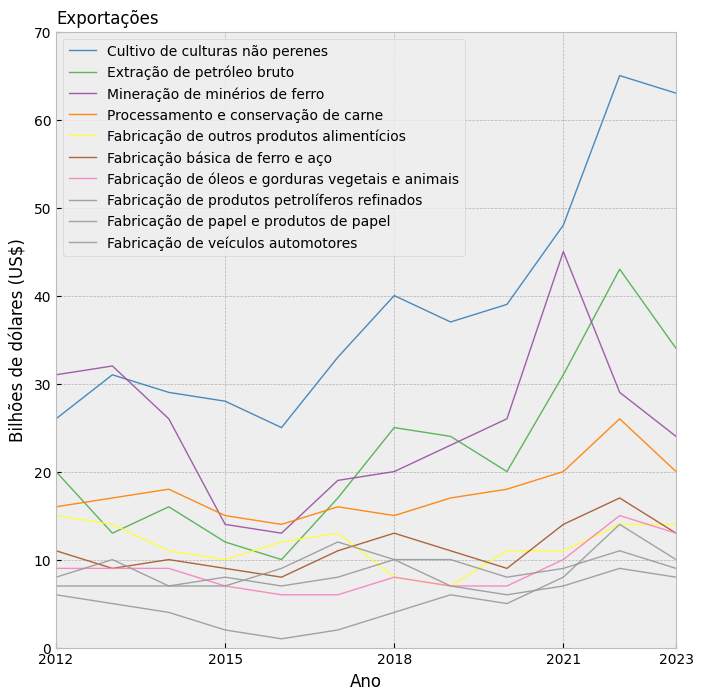

In [212]:
plt.figure(figsize=(8, 8))

plotando_exportacoes = pd.DataFrame({
    'x': x,
    'Cultivo de culturas não perenes': cultivo_culturas,
    'Extração de petróleo bruto': extr_petr_bruto, 
    'Mineração de minérios de ferro': mineracao_ferro,
    'Processamento e conservação de carne': process_carne,
    'Fabricação de outros produtos alimentícios': prod_aliment,
    'Fabricação básica de ferro e aço': fabr_ferro_e_aco,
    'Fabricação de óleos e gorduras vegetais e animais': oleos_gord_veg_anim,
    'Fabricação de produtos petrolíferos refinados': prod_petrol_refin,
    'Fabricação de papel e produtos de papel': fabr_papel,
    'Fabricação de veículos automotores': veic_automotores
})

# escolhendo o estilo do mapa
plt.style.use('bmh')

# definindo a paleta
palette = plt.get_cmap('Set1')

# criando um laço for para plotar múltiplas linhas
num = 0
for column in plotando_exportacoes.drop('x', axis=1):
    num += 1
    color = palette(num)
    plt.plot(plotando_exportacoes['x'], plotando_exportacoes[column], color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)

# estabelecendo a escala dos eixos x e y

plt.ylim(0,70)
plt.xlim(2012,2023)

eixo_y = [0,10,20,30,40,50,60,70]
plt.yticks(eixo_y)
plt.yticks(eixo_y, ['0','10','20','30','40','50','60','70'])

eixo_x = [2012, 2015, 2018, 2021, 2023]
plt.xticks(eixo_x, ['2012', '2015', '2018', '2021', '2023'])

# alterando o tamanho

plt.xticks(fontsize="10")
plt.yticks(fontsize="10")

plt.legend(fontsize="10", loc='upper left')

plt.title("Exportações", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Ano")
plt.ylabel("Bilhões de dólares (US$)")

plt.show()

In [213]:
top10_exportacoes.columns.values[0] = 'Ano'

In [214]:
top10_exportacoes

,Ano,Cultivo de culturas não perenes,Extração de petróleo bruto,Mineração de minérios de ferro,Processamento e conservação de carne,Fabricação de outros produtos alimentícios,Fabricação básica de ferro e aço,Fabricação de óleos e gorduras vegetais e animais,Fabricação de produtos petrolíferos refinados,Fabricação de papel e produtos de papel,Fabricação de veículos automotores
0,2023.0,63.0,34.0,24.0,20.0,14.0,13.0,13.0,10.0,9.0,8.0
1,2022.0,65.0,43.0,29.0,26.0,14.0,17.0,15.0,14.0,11.0,9.0
2,2021.0,48.0,31.0,45.0,20.0,11.0,14.0,10.0,8.0,9.0,7.0
3,2020.0,39.0,20.0,26.0,18.0,11.0,9.0,7.0,5.0,8.0,6.0
4,2019.0,37.0,24.0,23.0,17.0,7.0,11.0,7.0,6.0,10.0,7.0
5,2018.0,40.0,25.0,20.0,15.0,8.0,13.0,8.0,4.0,10.0,10.0
6,2017.0,33.0,17.0,19.0,16.0,13.0,11.0,6.0,2.0,8.0,12.0
7,2016.0,25.0,10.0,13.0,14.0,12.0,8.0,6.0,1.0,7.0,9.0
8,2015.0,28.0,12.0,14.0,15.0,10.0,9.0,7.0,2.0,8.0,7.0
9,2014.0,29.0,16.0,26.0,18.0,11.0,10.0,9.0,4.0,7.0,7.0


In [215]:
top10_exportacoes = top10_exportacoes.sort_values('index', ascending=True)

In [216]:
# o gráfico ficou com muita informação visual, então vamos plotar um novo gráfico com apenas 5 variáveis no eixo y

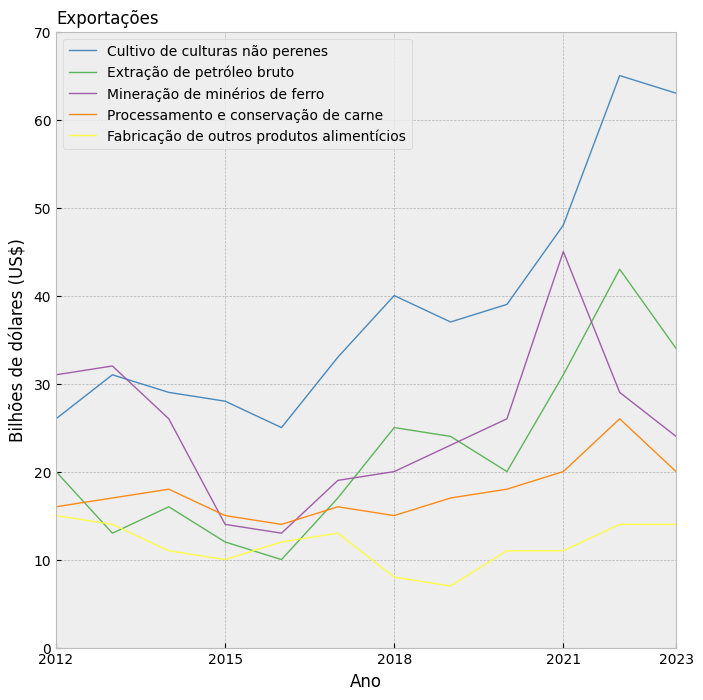

In [217]:
plt.figure(figsize=(8, 8))

plotando_exportacoes = pd.DataFrame({
    'x': x,
    'Cultivo de culturas não perenes': cultivo_culturas,
    'Extração de petróleo bruto': extr_petr_bruto, 
    'Mineração de minérios de ferro': mineracao_ferro,
    'Processamento e conservação de carne': process_carne,
    'Fabricação de outros produtos alimentícios': prod_aliment
})

# escolhendo o estilo do mapa
plt.style.use('bmh')

# definindo a paleta
palette = plt.get_cmap('Set1')

# criando um laço for para plotar múltiplas linhas
num = 0
for column in plotando_exportacoes.drop('x', axis=1):
    num += 1
    color = palette(num)
    plt.plot(plotando_exportacoes['x'], plotando_exportacoes[column], color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)

# estabelecendo a escala dos eixos x e y

plt.ylim(0,70)
plt.xlim(2012,2023)

eixo_y = [0,10,20,30,40,50,60,70]
plt.yticks(eixo_y)
plt.yticks(eixo_y, ['0','10','20','30','40','50','60','70'])

eixo_x = [2012, 2015, 2018, 2021, 2023]
plt.xticks(eixo_x, ['2012', '2015', '2018', '2021', '2023'])

# alterando o tamanho

plt.xticks(fontsize="10")
plt.yticks(fontsize="10")

plt.legend(fontsize="10", loc='upper left')

plt.title("Exportações", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Ano")
plt.ylabel("Bilhões de dólares (US$)")

plt.show()

In [218]:
top10_exportacoes.to_csv('../datasets/base_alterada_8_top10exportacoes.csv', index=False)

O gráfico explicita o papel que o cultivo de culturas não perenes (como a soja e a cana de açúcar) e o processamento de carnes (como a carne bovina) desempenham nas exportações, e portanto, na economia brasileira.

Essas visualizações explicitam a dimensão do problema a ser enfrentado quando falamos de mudança climática. Se um dos determinantes centrais desta mudança é a emissão de CO2 que resulta no aquecimento global, e sendo o desmatamento a segunda maior fonte antropogênica de gases do efeito estufa (Pendrill et al., 2019), é inegável que a economia do nosso país contribui para o problema, com seu foco na produção agropecuária para exportação.

É um desafio multifacetado e com inúmeros desdobramentos, mas um primeiro passo para o enfrentamento pode ser o reconhecimento das suas principais causas, para que seja possível efetuar mudanças significativas no rumo que se tem tomado até aqui.